# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time
from datetime import datetime 

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [2]:
model_name = "codegeex4" # "llama3" # "qwen2.5" # 'deepseek-coder-v2'
CONFIG = {
    'model': model_name,   
}

file_db = "~/Downloads/chinook.sqlite"

clean_and_train = True  # False  

sql_id = 1

allow_llm_to_see_data = True
# allow_llm_to_see_data (bool): Whether to allow the LLM to see the data (for the purposes of introspecting the data to generate the final SQL).

In [ ]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

In [4]:
vn = MyVanna(config=CONFIG)

In [5]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: ducklover1


In [6]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [7]:
vn.run_sql_is_set

True

In [8]:
if clean_and_train:
    vn.remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [9]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [10]:
df_ddl

type                                                sql
0   table  CREATE TABLE "albums"\r\n(\r\n    [AlbumId] IN...
1   table             CREATE TABLE sqlite_sequence(name,seq)
2   table  CREATE TABLE "artists"\r\n(\r\n    [ArtistId] ...
3   table  CREATE TABLE "customers"\r\n(\r\n    [Customer...
4   table  CREATE TABLE "employees"\r\n(\r\n    [Employee...
5   table  CREATE TABLE "genres"\r\n(\r\n    [GenreId] IN...
6   table  CREATE TABLE "invoices"\r\n(\r\n    [InvoiceId...
7   table  CREATE TABLE "invoice_items"\r\n(\r\n    [Invo...
8   table  CREATE TABLE "media_types"\r\n(\r\n    [MediaT...
9   table  CREATE TABLE "playlists"\r\n(\r\n    [Playlist...
10  table  CREATE TABLE "playlist_track"\r\n(\r\n    [Pla...
11  table  CREATE TABLE "tracks"\r\n(\r\n    [TrackId] IN...
12  index  CREATE INDEX [IFK_AlbumArtistId] ON "albums" (...
13  index  CREATE INDEX [IFK_CustomerSupportRepId] ON "cu...
14  index  CREATE INDEX [IFK_EmployeeReportsTo] ON "emplo...
15  index  CREATE INDEX [IFK_InvoiceCustomerId] ON "invoi...
16  index  CREATE INDEX [IFK_InvoiceLineInvoiceId] ON "in...
17  index  CREATE INDEX [IFK_InvoiceLineTrackId] ON "invo...
18  index  CREATE INDEX [IFK_PlaylistTrackTrackId] ON "pl...
19  index  CREATE INDEX [IFK_TrackAlbumId] ON "tracks" ([...
20  index  CREATE INDEX [IFK_TrackGenreId] ON "tracks" ([...
21  index  CREATE INDEX [IFK_TrackMediaTypeId] ON "tracks...
22  table            CREATE TABLE sqlite_stat1(tbl,idx,stat)

In [11]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")

    doc_str = """
    In the 'customers' table, address column names do not have 'Billing' prefix, 
    e.g. country column name is 'country', not 'BillingCountry'
    """
    vn.train(documentation=doc_str)


Adding ddl: CREATE TABLE "albums"
(
    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE "artists"
(
    ArtistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Name NVARCHAR(120)
)
Adding ddl: CREATE TABLE "customers"
(
    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TAB

In [12]:
# show training data
training_data = vn.get_training_data()
training_data

id question  \
0   039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl     None   
1   0db84e3d-ef41-563c-803e-21c1b985dc19-ddl     None   
2   10cba811-ddba-5042-9e90-d764dfcd1629-ddl     None   
3   2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl     None   
4   37319c81-65f7-50ee-956b-795de244bee5-ddl     None   
5   40bd77cd-e1de-5872-8693-624117ff413c-ddl     None   
6   41130543-7164-562a-90a7-0fd0a409c154-ddl     None   
7   458debc8-8082-5450-a17a-66028bd55ace-ddl     None   
8   4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl     None   
9   48d484e9-984c-58ff-b391-75521c69d486-ddl     None   
10  551e1120-a6ee-554f-8b8a-ccf4f22d3636-ddl     None   
11  5ff4911e-45c1-5a59-9566-243a9b6a3320-ddl     None   
12  65df0648-bf05-5f75-9365-c21f54b2302d-ddl     None   
13  6b585176-e66d-5b23-8d86-ca8a80e3af3d-ddl     None   
14  868758b8-e018-55e7-8cc3-75c0e6d211c8-ddl     None   
15  9ea4613d-c1be-5a77-ada9-c54ee3f0cab7-ddl     None   
16  a9c9a852-608d-5ef2-aede-26ba098d83d1-ddl     None   
17  b42cc9e1-9219-5a42-9a06-de906f76239e-ddl     None   
18  c387b9d2-5ff4-5a07-8364-f5dab45bb2a9-ddl     None   
19  d654f328-dc36-549e-84c3-06ee0db7e0f7-ddl     None   
20  d93f0d68-023d-5afb-8121-ba346699d318-ddl     None   
21  e5879308-329e-543f-a693-0c14e2f9972e-ddl     None   
22  ea84418b-1a28-59b4-a1f4-2fb674208adc-ddl     None   
0   2b4dda0a-a6ac-5e34-8f76-e41c0734d55e-doc     None   
1   ece10d36-9223-5045-9ac8-4b5bc090acb5-doc     None   

                                              content training_data_type  
0   CREATE TABLE "artists"\r\n(\r\n    ArtistId IN...                ddl  
1   CREATE TABLE "invoices"\r\n(\r\n    InvoiceId ...                ddl  
2   CREATE INDEX IFK_InvoiceCustomerId ON "invoice...                ddl  
3   CREATE INDEX IFK_CustomerSupportRepId ON "cust...                ddl  
4             CREATE TABLE sqlite_stat1(tbl,idx,stat)                ddl  
5   CREATE INDEX IFK_InvoiceLineInvoiceId ON "invo...                ddl  
6   CREATE TABLE "albums"\r\n(\r\n    AlbumId INTE...                ddl  
7   CREATE TABLE "playlists"\r\n(\r\n    PlaylistI...                ddl  
8   CREATE TABLE "invoice_items"\r\n(\r\n    Invoi...                ddl  
9   CREATE INDEX IFK_PlaylistTrackTrackId ON "play...                ddl  
10  CREATE INDEX IFK_AlbumArtistId ON "albums" (Ar...                ddl  
11  CREATE TABLE "employees"\r\n(\r\n    EmployeeI...                ddl  
12  CREATE TABLE "media_types"\r\n(\r\n    MediaTy...                ddl  
13  CREATE INDEX IFK_EmployeeReportsTo ON "employe...                ddl  
14  CREATE INDEX IFK_TrackAlbumId ON "tracks" (Alb...                ddl  
15  CREATE INDEX IFK_TrackMediaTypeId ON "tracks" ...                ddl  
16  CREATE INDEX IFK_TrackGenreId ON "tracks" (Gen...                ddl  
17  CREATE TABLE "tracks"\r\n(\r\n    TrackId INTE...                ddl  
18  CREATE TABLE "genres"\r\n(\r\n    GenreId INTE...                ddl  
19  CREATE TABLE "playlist_track"\r\n(\r\n    Play...                ddl  
20  CREATE TABLE "customers"\r\n(\r\n    CustomerI...                ddl  
21  CREATE INDEX IFK_InvoiceLineTrackId ON "invoic...                ddl  
22             CREATE TABLE sqlite_sequence(name,seq)                ddl  
0         In the chinook database invoice means order      documentation  
1   \n    In the 'customers' table, address column...      documentation

## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

In [13]:
ts_start = time()

```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```


In [14]:
questions = [
    "Can you list all tables in the SQLite database catalog?",
    "which table stores customer's orders",
    "How many customers are there",
    "what are the top 5 countries that customers come from?",
    "List all albums and their corresponding artist names  ",
    """Find all tracks with a name containing "What" (case-insensitive) """,
    "Get the total number of invoices for each customer",
    "Find the total number of invoices per country",
    "List all invoices with a total exceeding $10",
    "Find all invoices since 2010 and the total amount invoiced:",
    "List all employees and their reporting manager's name (if any):",
    " Get the average invoice total for each customer:",
    "Find the top 5 most expensive tracks (based on unit price):",
    "List all genres and the number of tracks in each genre:",
    "Get all genres that do not have any tracks associated with them:",
    "List all customers who have not placed any orders:",
    """ 
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    """,
    "List all customers from Canada and their email addresses:",
    "Find the customer with the most invoices ",
    "Find the customer who bought the most albums in total quantity (across all invoices):",
    """      
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    """,
    """  
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    """,
    "Get all playlists containing at least 10 tracks and the total duration of those tracks:",
    "Identify artists who have albums with tracks appearing in multiple genres:",
]

### Loop over questions

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 2:  Can you list all tables in the SQLite database catalog?


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE sqlite_stat1(tbl,idx,stat)\n\nCREATE TABLE sqlite_sequence(name,seq)\n\nCREATE TABLE "playlists"\r\n(\r\n    PlaylistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "genres"\r\n(\r\n    GenreId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,

SELECT name FROM sqlite_master WHERE type='table'


[( DATA )]
queried dataframe


name
0            albums
1   sqlite_sequence
2           artists
3         customers
4         employees
5            genres
6          invoices
7     invoice_items
8       media_types
9         playlists
10   playlist_track
11           tracks
12     sqlite_stat1


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Can you list all tables in the SQLite database catalog?'\n\nThe DataFrame was produced using this query: SELECT name FROM sqlite_master WHERE type='table'\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n name    object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'codegeex4:latest', 'created_at': '2024-10-13T14:34:51.637570649Z', 'message': {'role': 'assistant', 'content': '```p

<string>:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`




[( PYTHON )]
generated Plotly code


import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Get the value from the DataFrame
value = df.iloc[0][0]

# Check if there is only one value in the dataframe
if len(df) == 1:
    # Add an Indicator trace
    fig.add_trace(go.Indicator(
        mode="number",
        value=value,
        title={"text": "Table Count"},
    ))
else:
    # Assume the dataframe has two columns, 'Category' and 'Value'
    category = df.columns[0]
    values = df.iloc[:, 1].tolist()

    # Add a bar trace
    fig.add_trace(go.Bar(
        x=df[category],
        y=values,
        name="Table Counts",
        marker_color='blue'
    ))

# Update layout
fig.update_layout(
    title_text="Tables in SQLite Database Catalog",
    xaxis_title="Category",
    yaxis_title="Value"
)

# Show figure

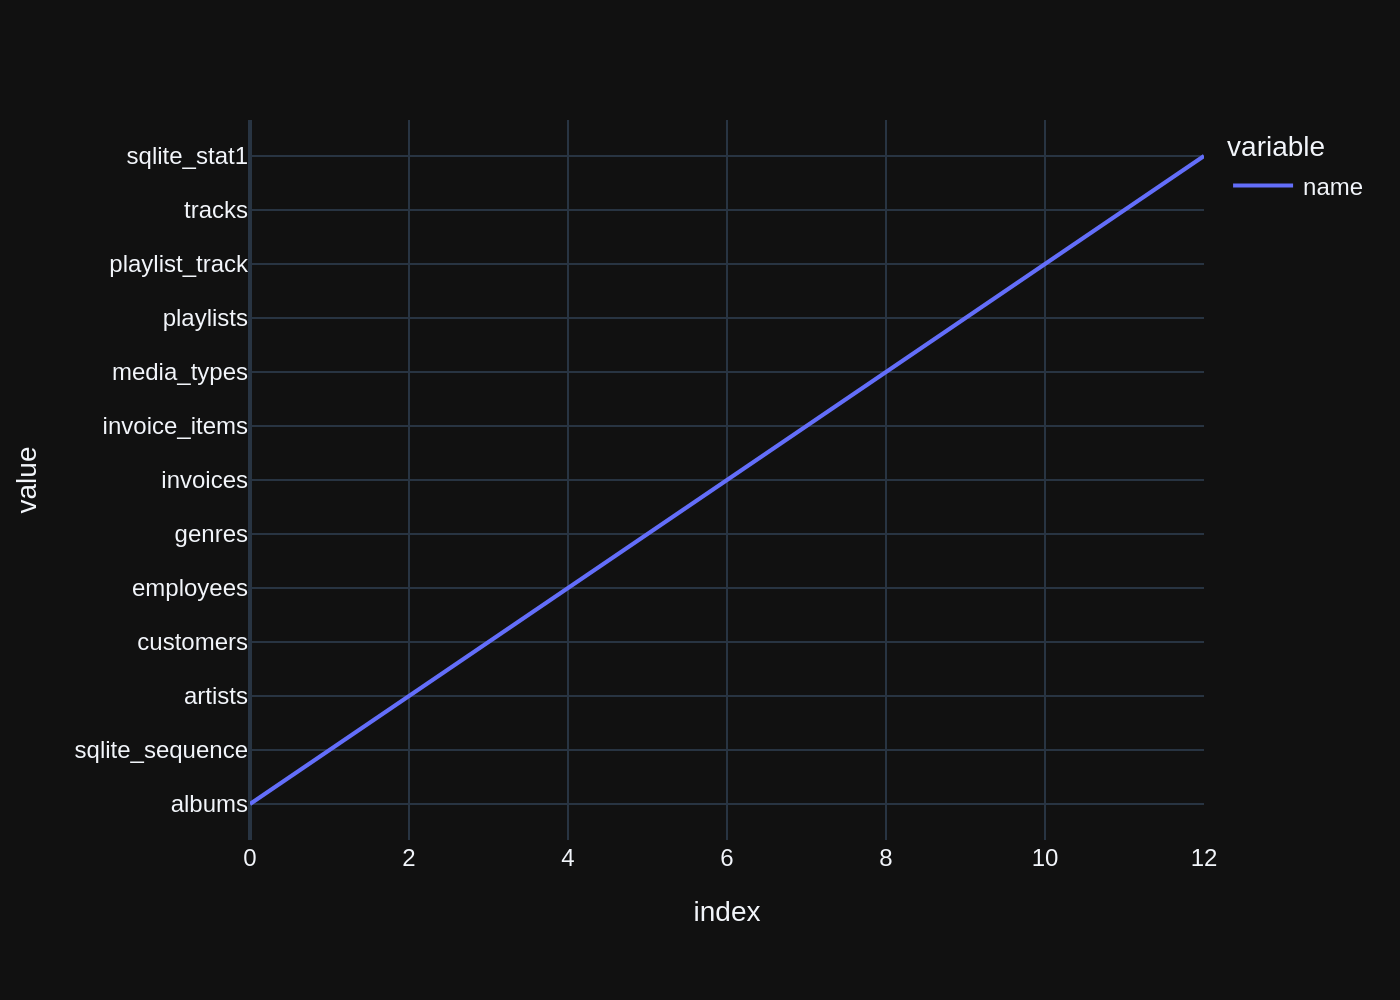

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 3:  which table stores customer's orders


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n 

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



[( Ollama Response )]
{'model': 'codegeex4:latest', 'created_at': '2024-10-13T14:36:11.99563312Z', 'message': {'role': 'assistant', 'content': "The `invoices` table stores customer's orders."}, 'done_reason': 'stop', 'done': True, 'total_duration': 79725418974, 'load_duration': 9849191, 'prompt_eval_count': 996, 'prompt_eval_duration': 77101447000, 'eval_count': 11, 'eval_duration': 2411926000}

[( LLM Response )]
The `invoices` table stores customer's orders.
*** RETRY 1 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE sqlite_sequence(name,seq)\n\nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    Bi

SELECT name FROM sqlite_master WHERE type='table'


[( DATA )]
queried dataframe


name
0            albums
1   sqlite_sequence
2           artists
3         customers
4         employees
5            genres
6          invoices
7     invoice_items
8       media_types
9         playlists
10   playlist_track
11           tracks
12     sqlite_stat1


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: '\n            For this question: which table stores customer's orders, \n            your generated SQL statement: The `invoices` table stores customer's orders. results in the following exception: [ERROR-SQL] the generated SQL : The `invoices` table stores customer's orders.\n does not starts with ('select','with') .\n            Can you please fix the error and re-generate the SQL statement?\n        '\n\nThe DataFrame was produced using this query: SELECT name FROM sqlite_master WHERE type='table'\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n name    object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assu

import plotly.graph_objects as go

# Determine if all values in the DataFrame are the same or if it has multiple values
if df['name'].nunique() == 1:
    # Create an Indicator chart
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['name'].iloc[0],
        title={"text": "Table containing customer orders"},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))
else:
    # Create a bar chart
    fig = go.Figure(data=[
        go.Bar(name='Tables', x=df['name'], y=[1]*len(df))
    ])
    fig.update_layout(barmode='group')

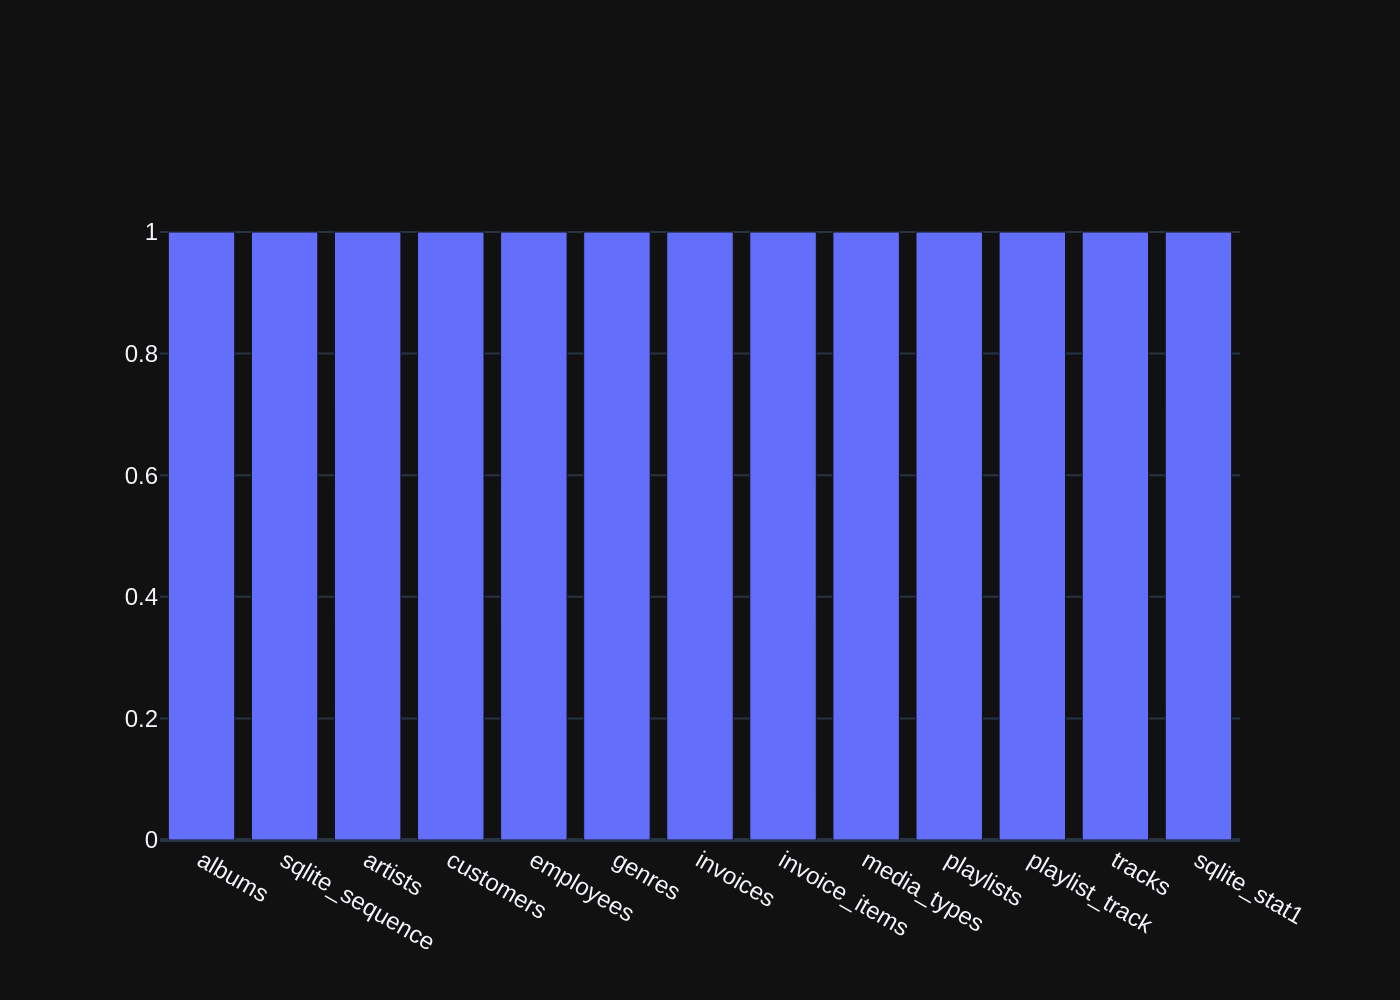

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 4:  How many customers are there


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_CustomerSupportRepId ON "customers" (SupportRepId)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName N

SELECT count(*) AS NumberOfCustomers FROM customers


[( DATA )]
queried dataframe


NumberOfCustomers
0                 59


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'How many customers are there'\n\nThe DataFrame was produced using this query: SELECT count(*) AS NumberOfCustomers FROM customers\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n NumberOfCustomers    int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'codegeex4:latest', 'created_at': '2024-10-13T14:40:23.395770049Z', 'message': {'role': 'assistant', 'content': '```python\nimport

import plotly.graph_objects as go

if df.shape[0] == 1:
    fig = go.Figure(go.Indicator(
        mode="number+delta",
        value=df['NumberOfCustomers'].values[0],
        title={"text": "Number of Customers", "font": {"size": 40}},
        delta={"reference": 0, "relative": True},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))
else:
    fig = go.Figure(go.Bar(
        x=df.index,
        y=df['NumberOfCustomers'],
        name='Number of Customers',
        marker=dict(color='#008B8B')
    ))

fig.update_layout(title_text='Total Number of Customers', plot_bgcolor='white')

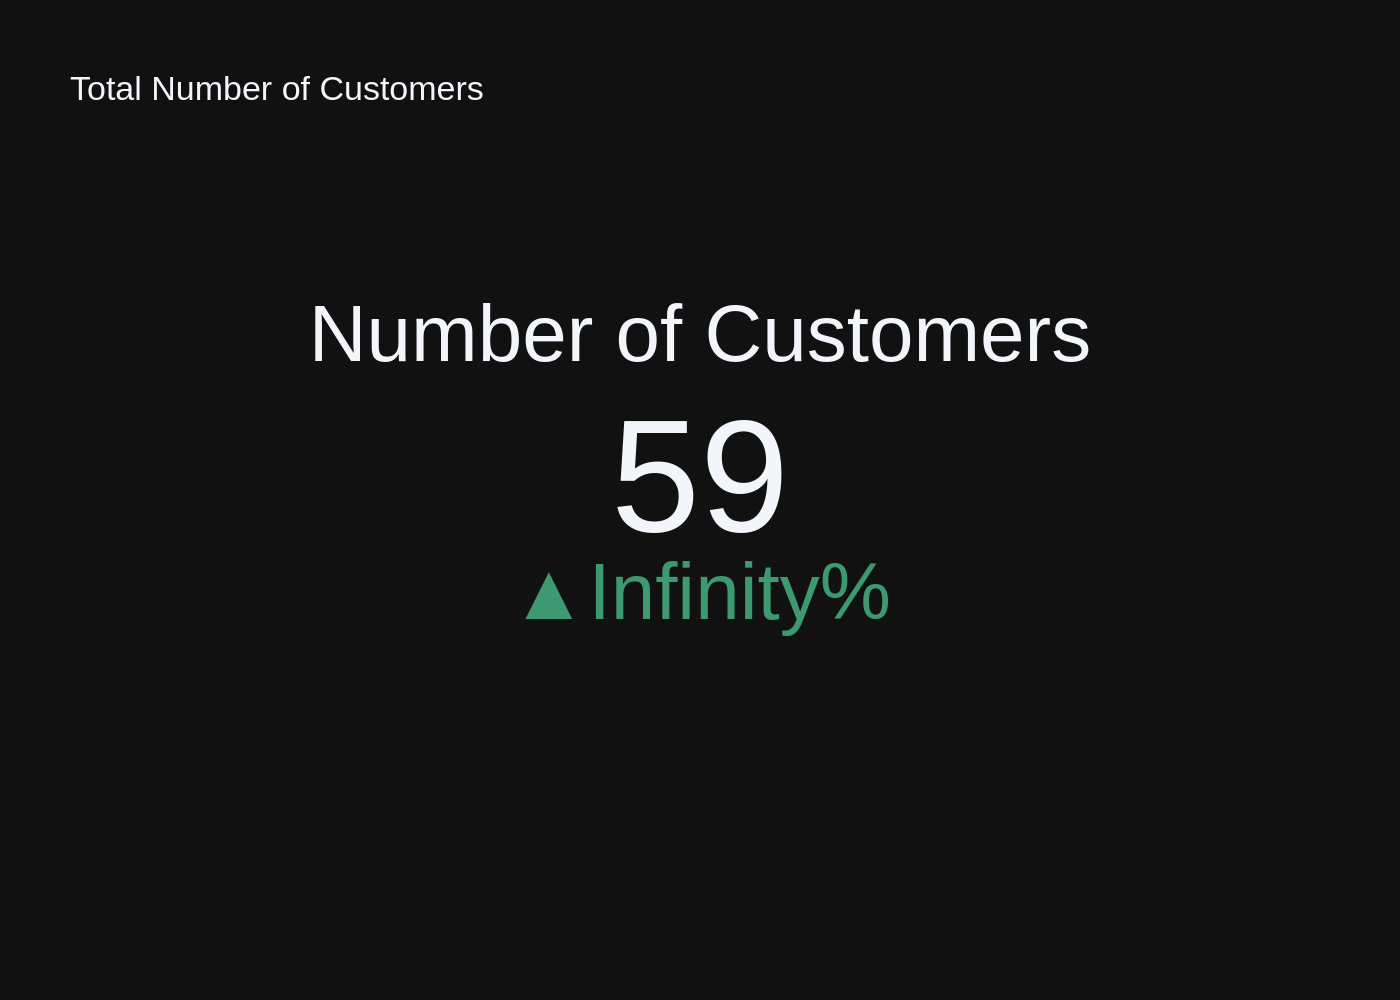

Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 5:  what are the top 5 countries that customers come from?


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCH

SELECT BillingCountry, COUNT(*) as CountryCount FROM invoices GROUP BY BillingCountry ORDER BY CountryCount DESC LIMIT 5


[( DATA )]
queried dataframe


BillingCountry  CountryCount
0            USA            91
1         Canada            56
2         France            35
3         Brazil            35
4        Germany            28


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'what are the top 5 countries that customers come from?'\n\nThe DataFrame was produced using this query: SELECT BillingCountry, COUNT(*) as CountryCount FROM invoices GROUP BY BillingCountry ORDER BY CountryCount DESC LIMIT 5\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n BillingCountry    object\nCountryCount       int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'codegeex4:

import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number+delta",
        value=df['CountryCount'].values[0],
        title={'text': "Top Country"},
        domain={'x': [0, 1], 'y': [0, 1]},
        delta={'reference': df['CountryCount'].max() - df['CountryCount'].min()},
        gauge={
            'shape': "bullet",
            'axis': {'visible': True, 'range': [0, df['CountryCount'].max()]},
            'thresholds': {
                'line': {'color': "black", 'width': 2},
                'thickness': 0.75,
                'value': df['CountryCount'].values[0]
            },
        }
    ))
else:
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df['BillingCountry'],
        y=df['CountryCount'],
        name='Countries',
        marker=dict(color='rgb(158,202,225)', line=dict(color='rgb(8,48,107)', width=1.5)),
        opacity=0.6
    ))
    fig.update_layout(title_text="Top 5 Countries by Customer Count",
                      xaxis_tickangle=-45,
                      yaxis=dict(range=[0, df['CountryCount'].max() + 100]))

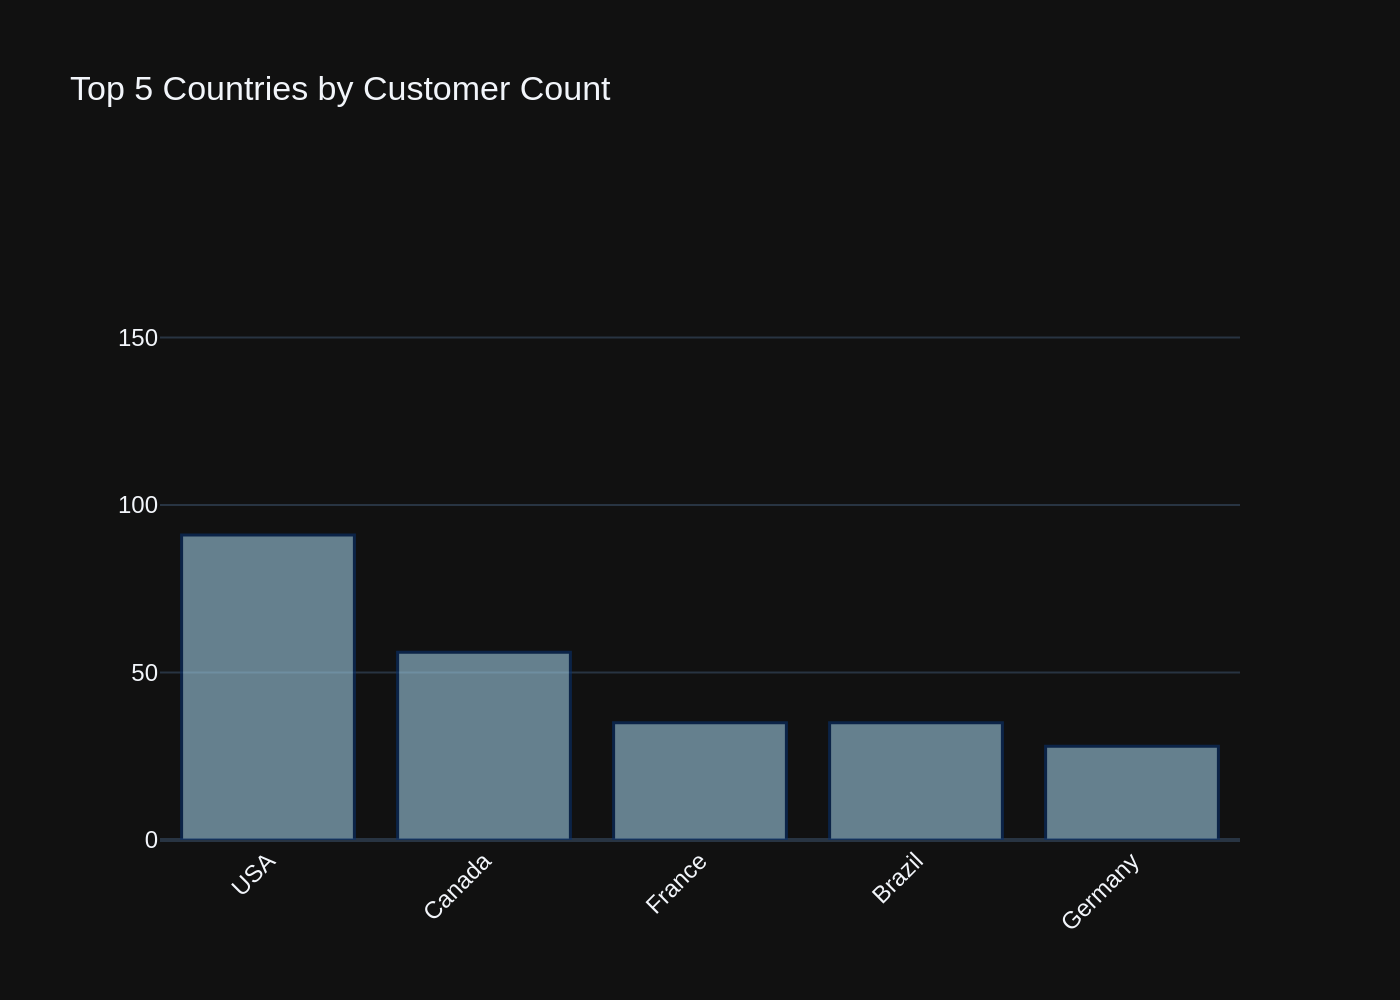

Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 6:  List all albums and their corresponding artist names  


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_AlbumArtistId ON "albums" (ArtistId)\n\nCREATE TABLE "albums"\r\n(\r\n    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Title NVARCHAR(160)  NOT NULL,\r\n    ArtistId INTEGER  NOT NULL,\r\n    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(1

SELECT Title, Name FROM albums LEFT JOIN artists ON albums.ArtistId = artists.ArtistId


[( DATA )]
queried dataframe


Title  \
0                For Those About To Rock We Salute You   
1                                    Balls to the Wall   
2                                    Restless and Wild   
3                                    Let There Be Rock   
4                                             Big Ones   
..                                                 ...   
342                             Respighi:Pines of Rome   
343  Schubert: The Late String Quartets & String Qu...   
344                                Monteverdi: L'Orfeo   
345                              Mozart: Chamber Music   
346  Koyaanisqatsi (Soundtrack from the Motion Pict...   

                                                  Name  
0                                                AC/DC  
1                                               Accept  
2                                               Accept  
3                                                AC/DC  
4                                            Aerosmith  
..                                                 ...  
342                                     Eugene Ormandy  
343                             Emerson String Quartet  
344  C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...  
345                                      Nash Ensemble  
346                              Philip Glass Ensemble  

[347 rows x 2 columns]


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all albums and their corresponding artist names  '\n\nThe DataFrame was produced using this query: SELECT Title, Name FROM albums LEFT JOIN artists ON albums.ArtistId = artists.ArtistId\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n Title    object\nName     object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'codegeex4:latest', 'created_at': '2024-10-13T14:45:00.42048840

import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="gauge+number",
        value=df['Name'].values[0],
        title={'text': df['Title'].values[0]},
        gauge={'bar':{'color':'darkblue'}}
    ))
else:
    fig = px.bar(df, x='Title', y='Name')

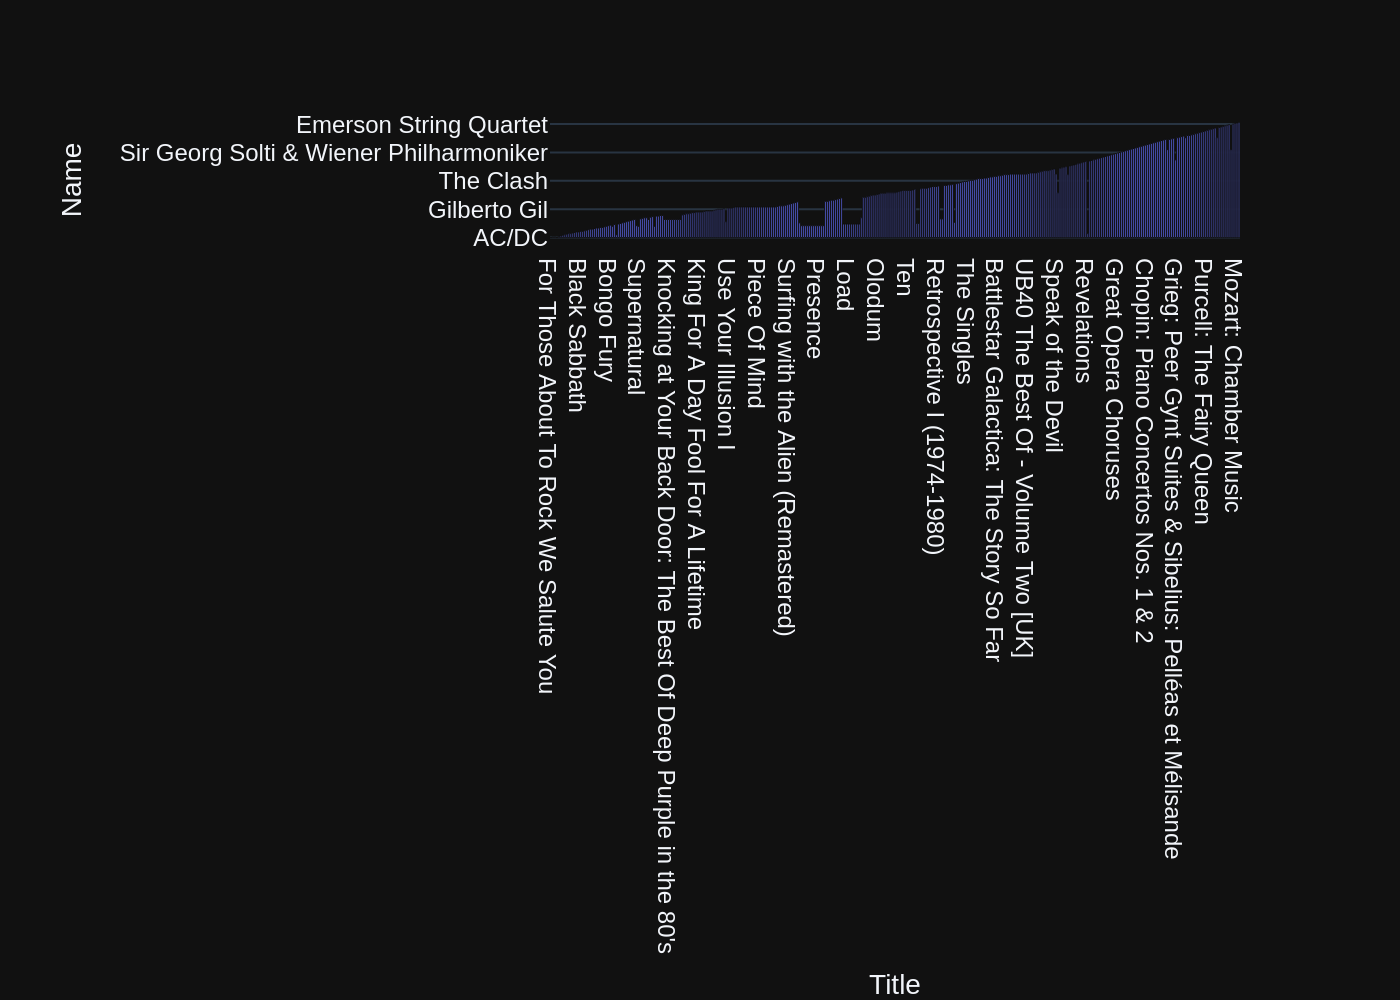

Number of requested results 10 is greater than number of elements in index 5, updating n_results = 5
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 7:  Find all tracks with a name containing "What" (case-insensitive) 


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON "tracks" (GenreId)\n\nCREATE INDEX IFK_PlaylistTrackTrackId ON "playlist_track" (TrackId)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DEL

SELECT DISTINCT Name FROM tracks INTERSECT SELECT DISTINCT Name FROM tracks WHERE Name LIKE '%what%'


[( DATA )]
queried dataframe


Name
0                              Do what cha wanna
1                              Get What You Need
2            I Don't Know What To Do With Myself
3     I Still Haven't Found What I'm Looking For
4     I Still Haven't Found What I'm Looking for
5                          Look What You've Done
6                                        So What
7                                     What A Day
8                                  What If I Do?
9               What Is And What Should Never Be
10                          What Is It About Men
11                                 What It Takes
12                                 What Kate Did
13                              What Now My Love
14                                  What You Are
15                   What is and Should Never Be
16              Whatever Gets You Thru the Night
17             Whatever It Is, I Just Can't Stop
18                      Whatever the Case May Be
19                                   Whatsername
20  You're What's Happening (In The World Today)


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find all tracks with a name containing \"What\" (case-insensitive) '\n\nThe DataFrame was produced using this query: SELECT DISTINCT Name FROM tracks INTERSECT SELECT DISTINCT Name FROM tracks WHERE Name LIKE '%what%'\n\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n Name    object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'codegeex4:latest', 'created_at': '2024-10-13T14:4

import plotly.express as px

# Create a figure for the bar chart or indicator based on the number of tracks found
if len(df) > 1:
    # Generate a bar chart for more than one track
    fig = px.bar(df, x="Name", title='Number of Tracks with Names Containing "What"')
else:
    # Generate an indicator for exactly one track
    fig = go.Indicator(mode="number+delta",
                       value=len(df),
                       title={'text': "Number of Tracks"},
                       delta={"reference": 0})

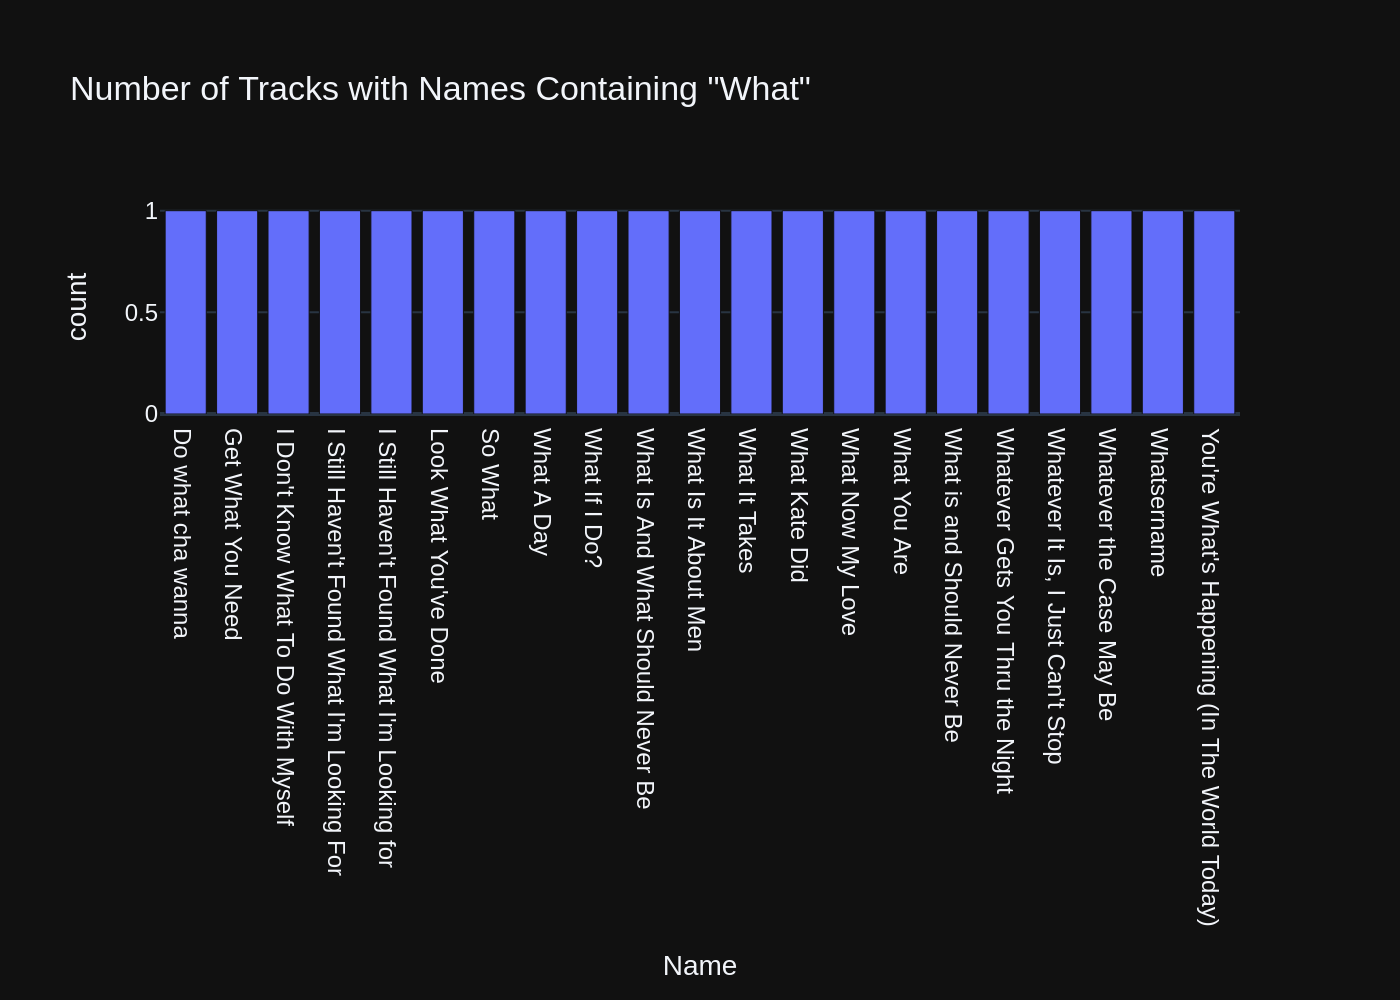

Number of requested results 10 is greater than number of elements in index 6, updating n_results = 6
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 8:  Get the total number of invoices for each customer


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_

SELECT customers.FirstName, customers.LastName, COUNT(*) AS TotalInvoices FROM customers LEFT JOIN invoices ON customers.CustomerId = invoices.CustomerId GROUP BY customers.CustomerId


[( DATA )]
queried dataframe


FirstName      LastName  TotalInvoices
0        Luís     Gonçalves              7
1      Leonie        Köhler              7
2    François      Tremblay              7
3       Bjørn        Hansen              7
4   František   Wichterlová              7
5      Helena          Holý              7
6      Astrid        Gruber              7
7        Daan       Peeters              7
8        Kara       Nielsen              7
9     Eduardo       Martins              7
10  Alexandre         Rocha              7
11    Roberto       Almeida              7
12   Fernanda         Ramos              7
13       Mark       Philips              7
14   Jennifer      Peterson              7
15      Frank        Harris              7
16       Jack         Smith              7
17   Michelle        Brooks              7
18        Tim         Goyer              7
19        Dan        Miller              7
20      Kathy         Chase              7
21    Heather       Leacock              7
22       John        Gordon              7
23      Frank       Ralston              7
24     Victor       Stevens              7
25    Richard    Cunningham              7
26    Patrick          Gray              7
27      Julia       Barnett              7
28     Robert         Brown              7
29     Edward       Francis              7
30     Martha          Silk              7
31      Aaron      Mitchell              7
32      Ellie      Sullivan              7
33       João     Fernandes              7
34   Madalena       Sampaio              7
35     Hannah     Schneider              7
36       Fynn    Zimmermann              7
37     Niklas      Schröder              7
38    Camille       Bernard              7
39  Dominique      Lefebvre              7
40       Marc        Dubois              7
41      Wyatt        Girard              7
42   Isabelle       Mercier              7
43      Terhi    Hämäläinen              7
44   Ladislav        Kovács              7
45       Hugh      O'Reilly              7
46      Lucas       Mancini              7
47   Johannes  Van der Berg              7
48  Stanisław        Wójcik              7
49    Enrique         Muñoz              7
50     Joakim     Johansson              7
51       Emma         Jones              7
52       Phil        Hughes              7
53      Steve        Murray              7
54       Mark        Taylor              7
55      Diego     Gutiérrez              7
56       Luis         Rojas              7
57      Manoj        Pareek              7
58       Puja    Srivastava              6


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Get the total number of invoices for each customer'\n\nThe DataFrame was produced using this query: SELECT customers.FirstName, customers.LastName, COUNT(*) AS TotalInvoices FROM customers LEFT JOIN invoices ON customers.CustomerId = invoices.CustomerId GROUP BY customers.CustomerId\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n FirstName        object\nLastName         object\nTotalInvoices     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer wit

import plotly.graph_objects as go

# Get unique customers and their corresponding TotalInvoices
customers = df.groupby('FirstName')['TotalInvoices'].sum()

if len(customers) == 1:
    # Create a gauge chart
    fig = go.Figure(go.Indicator(
        mode="gauge+number",
        value=customers.iloc[0],
        title={'text': "Total Invoices"},
        domain={'x': [0, 1], 'y': [0, 1]},
        gauge={
            'axis': {'range': [None, max(df['TotalInvoices'])]},
            'bar': {'color': "blue"},
            'steps': [
                {'range': [0, max(df['TotalInvoices'])/2], 'color': '#e4c0f5'},
                {'range': [max(df['TotalInvoices'])/2, max(df['TotalInvoices'])], 'color': '#9d2ba1'}
            ],
        }
    ))
else:
    # Create a bar chart
    fig = go.Figure(data=[go.Bar(x=customers.index, y=customers.values)])

# Update layout for better visualization
fig.update_layout(
    title_text='Total Invoices by Customer',
    xaxis_title_text='Customer',
    yaxis_title_text='Number of Invoices'
)

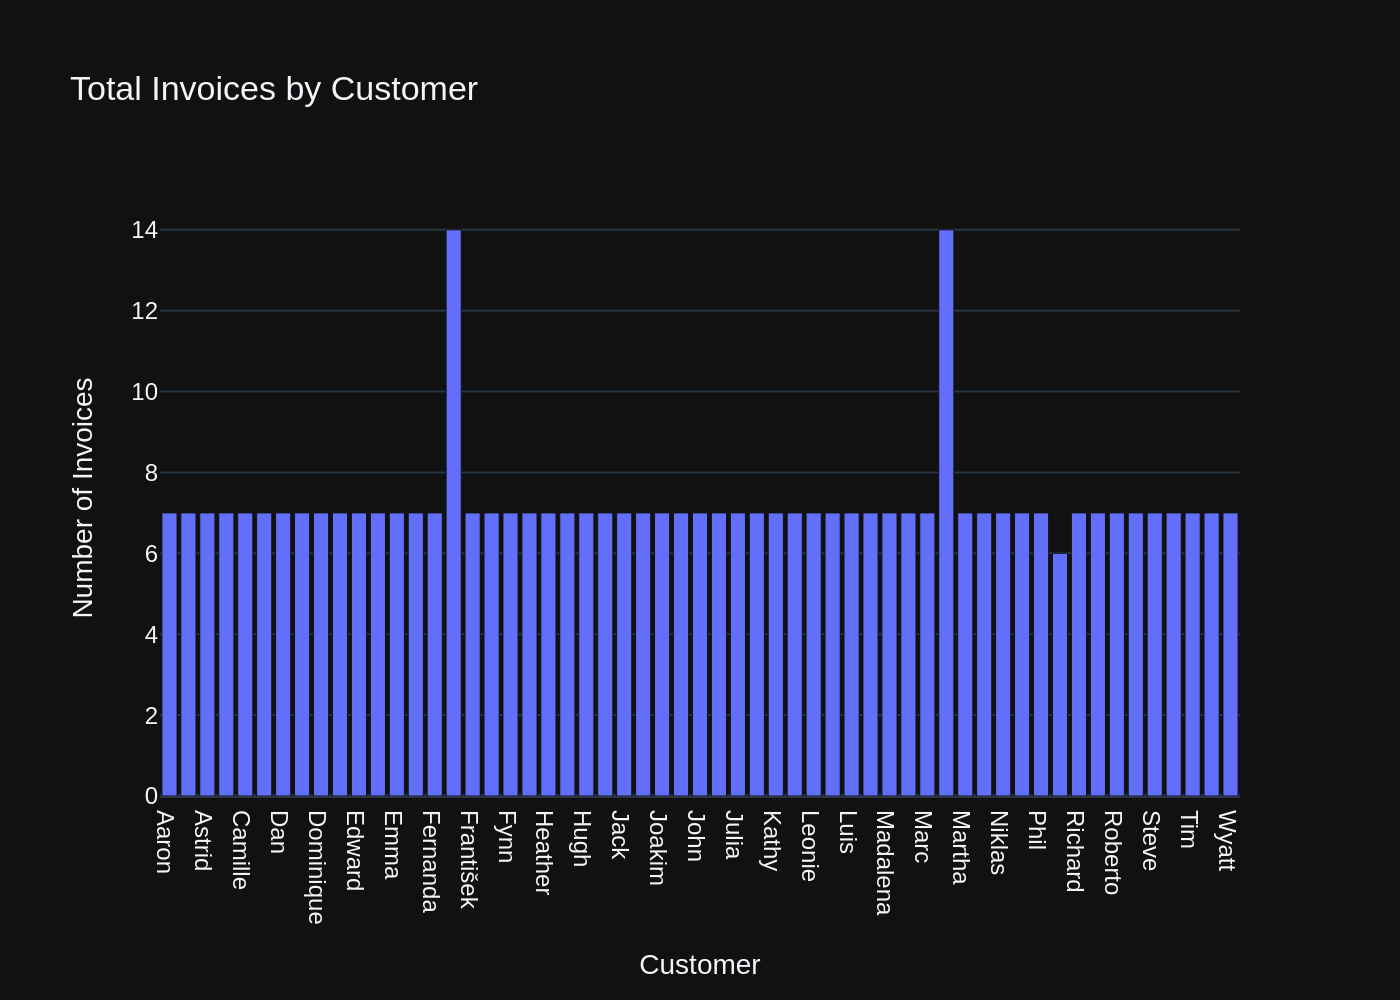

Number of requested results 10 is greater than number of elements in index 7, updating n_results = 7
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 9:  Find the total number of invoices per country


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\

SELECT BillingCountry, COUNT(*) as TotalInvoices FROM invoices GROUP BY BillingCountry


[( DATA )]
queried dataframe


BillingCountry  TotalInvoices
0        Argentina              7
1        Australia              7
2          Austria              7
3          Belgium              7
4           Brazil             35
5           Canada             56
6            Chile              7
7   Czech Republic             14
8          Denmark              7
9          Finland              7
10          France             35
11         Germany             28
12         Hungary              7
13           India             13
14         Ireland              7
15           Italy              7
16     Netherlands              7
17          Norway              7
18          Poland              7
19        Portugal             14
20           Spain              7
21          Sweden              7
22             USA             91
23  United Kingdom             21


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the total number of invoices per country'\n\nThe DataFrame was produced using this query: SELECT BillingCountry, COUNT(*) as TotalInvoices FROM invoices GROUP BY BillingCountry\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n BillingCountry    object\nTotalInvoices      int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'codegeex4:latest', 'created_at': '2024-10-13T14:53:

import plotly.express as px

# Determine if there is more than one unique country in the DataFrame
unique_countries = df['BillingCountry'].nunique()
if unique_countries > 1:
    # Plot bar chart if there are multiple countries
    fig = px.bar(df, x='BillingCountry', y='TotalInvoices', title='Total Invoices per Country')
else:
    # Use an Indicator if there is only one country
    fig = go.Figure(go.Indicator(
        mode="number+delta",
        value=df['TotalInvoices'].iloc[0],
        title={"text": "Total Invoices", "font": {"size": 24}},
        delta={"reference": 100, "increasing": {"color": "red"}, "decreasing": {"color": "green"}},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))

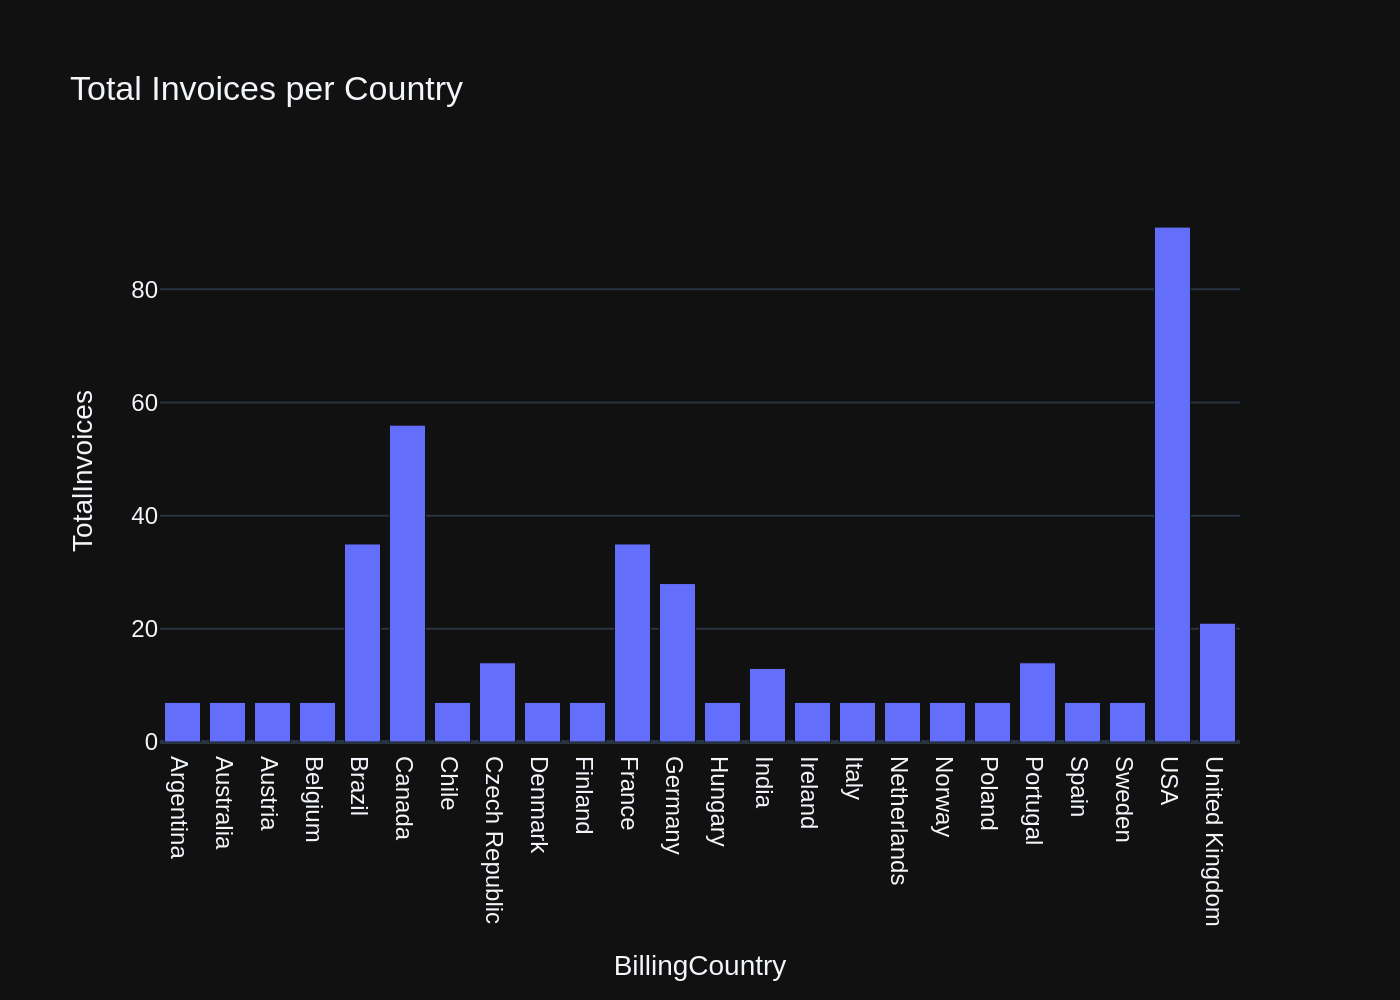

Number of requested results 10 is greater than number of elements in index 8, updating n_results = 8
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 10:  List all invoices with a total exceeding $10


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r\n    FOREIGN KEY (InvoiceId) REFERENCES "invoices" (InvoiceId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NU

SELECT * FROM invoices WHERE Total > 10


[( DATA )]
queried dataframe


InvoiceId  CustomerId          InvoiceDate             BillingAddress  \
0           5          23  2009-01-11 00:00:00            69 Salem Street   
1          12           2  2009-02-11 00:00:00    Theodor-Heuss-Straße 34   
2          19          40  2009-03-14 00:00:00             8, Rue Hanovre   
3          26          19  2009-04-14 00:00:00            1 Infinite Loop   
4          33          57  2009-05-15 00:00:00            Calle Lira, 198   
..        ...         ...                  ...                        ...   
59        383          10  2013-08-12 00:00:00  Rua Dr. Falcão Filho, 155   
60        390          48  2013-09-12 00:00:00      Lijnbaansgracht 120bg   
61        397          27  2013-10-13 00:00:00            1033 N Park Ave   
62        404           6  2013-11-13 00:00:00              Rilská 3174/6   
63        411          44  2013-12-14 00:00:00            Porthaninkatu 9   

   BillingCity BillingState  BillingCountry BillingPostalCode  Total  
0       Boston           MA             USA              2113  13.86  
1    Stuttgart         None         Germany             70174  13.86  
2        Paris         None          France             75002  13.86  
3    Cupertino           CA             USA             95014  13.86  
4     Santiago         None           Chile              None  13.86  
..         ...          ...             ...               ...    ...  
59   São Paulo           SP          Brazil         01007-010  13.86  
60   Amsterdam           VV     Netherlands              1016  13.86  
61      Tucson           AZ             USA             85719  13.86  
62      Prague         None  Czech Republic             14300  25.86  
63    Helsinki         None         Finland             00530  13.86  

[64 rows x 9 columns]


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all invoices with a total exceeding $10'\n\nThe DataFrame was produced using this query: SELECT * FROM invoices WHERE Total > 10\n\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n InvoiceId              int64\nCustomerId             int64\nInvoiceDate           object\nBillingAddress        object\nBillingCity           object\nBillingState          object\nBillingCountry        object\nBillingPostalCode     object\nTotal                float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. R

import plotly.graph_objects as go

# Check if the DataFrame has more than one row
if len(df) > 1:
    # Group by CustomerId and sum the Total column
    grouped_df = df.groupby('CustomerId')['Total'].sum().reset_index()
    
    # Sort the dataframe by total in descending order
    grouped_df.sort_values(by='Total', inplace=True, ascending=False)
    
    # Create bar chart
    fig = go.Figure(go.Bar(
        x=grouped_df['CustomerId'],
        y=grouped_df['Total'],
        name='Total',
        marker=dict(color='rgb(158,202,225)', line=dict(color='rgba(8,48,107,1.0)', width=1.5))
    ))
    
    # Update the layout
    fig.update_layout(
        title='Customers with Exceeding Total Invoice Value > $10',
        xaxis=dict(title='Customer ID'),
        yaxis=dict(title='Total Invoice Value')
    )
else:
    # Create indicator chart
    fig = go.Figure(go.Indicator(
        mode="number+delta",
        value=df['Total'].iloc[0],
        delta={'reference': 10},
        title={'text': "Total Invoice Value"}
    ))

# Show the plot

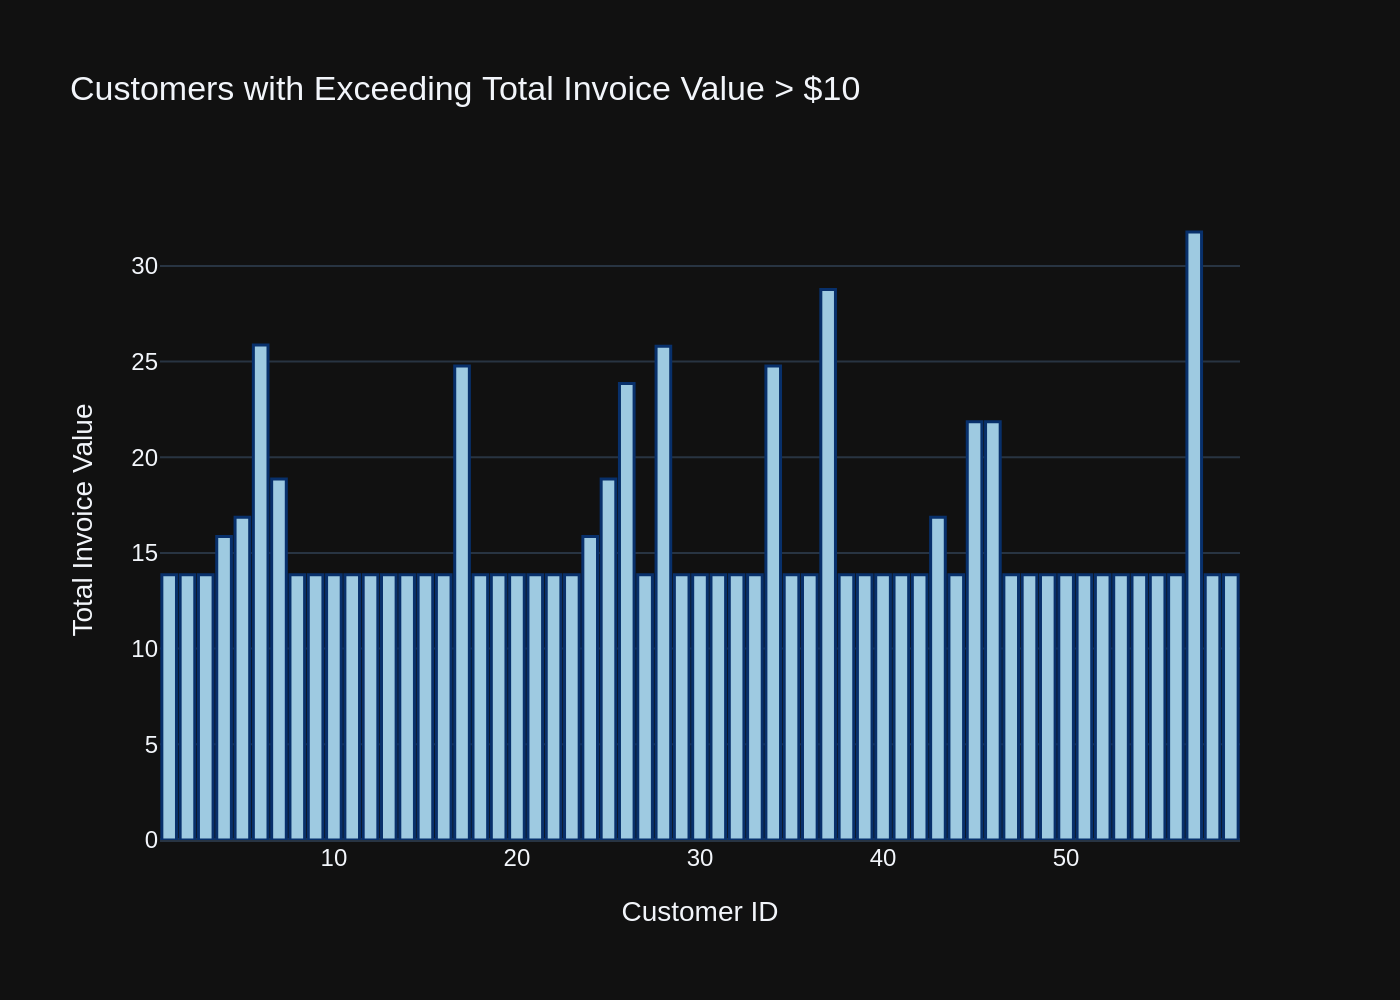

Number of requested results 10 is greater than number of elements in index 9, updating n_results = 9
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 11:  Find all invoices since 2010 and the total amount invoiced:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId

SELECT InvoiceId, Total, InvoiceDate FROM invoices WHERE strftime('%Y',InvoiceDate) > '2010'


[( DATA )]
queried dataframe


InvoiceId  Total          InvoiceDate
0          167   0.99  2011-01-02 00:00:00
1          168   1.98  2011-01-15 00:00:00
2          169   1.98  2011-01-15 00:00:00
3          170   3.96  2011-01-16 00:00:00
4          171   5.94  2011-01-17 00:00:00
..         ...    ...                  ...
241        408   3.96  2013-12-05 00:00:00
242        409   5.94  2013-12-06 00:00:00
243        410   8.91  2013-12-09 00:00:00
244        411  13.86  2013-12-14 00:00:00
245        412   1.99  2013-12-22 00:00:00

[246 rows x 3 columns]


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find all invoices since 2010 and the total amount invoiced:'\n\nThe DataFrame was produced using this query: SELECT InvoiceId, Total, InvoiceDate FROM invoices WHERE strftime('%Y',InvoiceDate) > '2010'\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n InvoiceId        int64\nTotal          float64\nInvoiceDate     object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'codegeex4:l

import plotly.graph_objects as go

# Check if the DataFrame has more than one row
if len(df) > 1:
    fig = go.Figure(data=[go.Scatter(x=df['InvoiceDate'], y=df['Total'])])
    fig.update_layout(title='Invoiced Amount Over Time', xaxis_title='Invoice Date', yaxis_title='Total')
else:
    # Assuming the single value is in a column named 'Total'
    value = df['Total'].iloc[0]
    fig = go.Figure(go.Indicator(mode="gauge+number", value=value, title={'text': "Invoiced Amount"}))

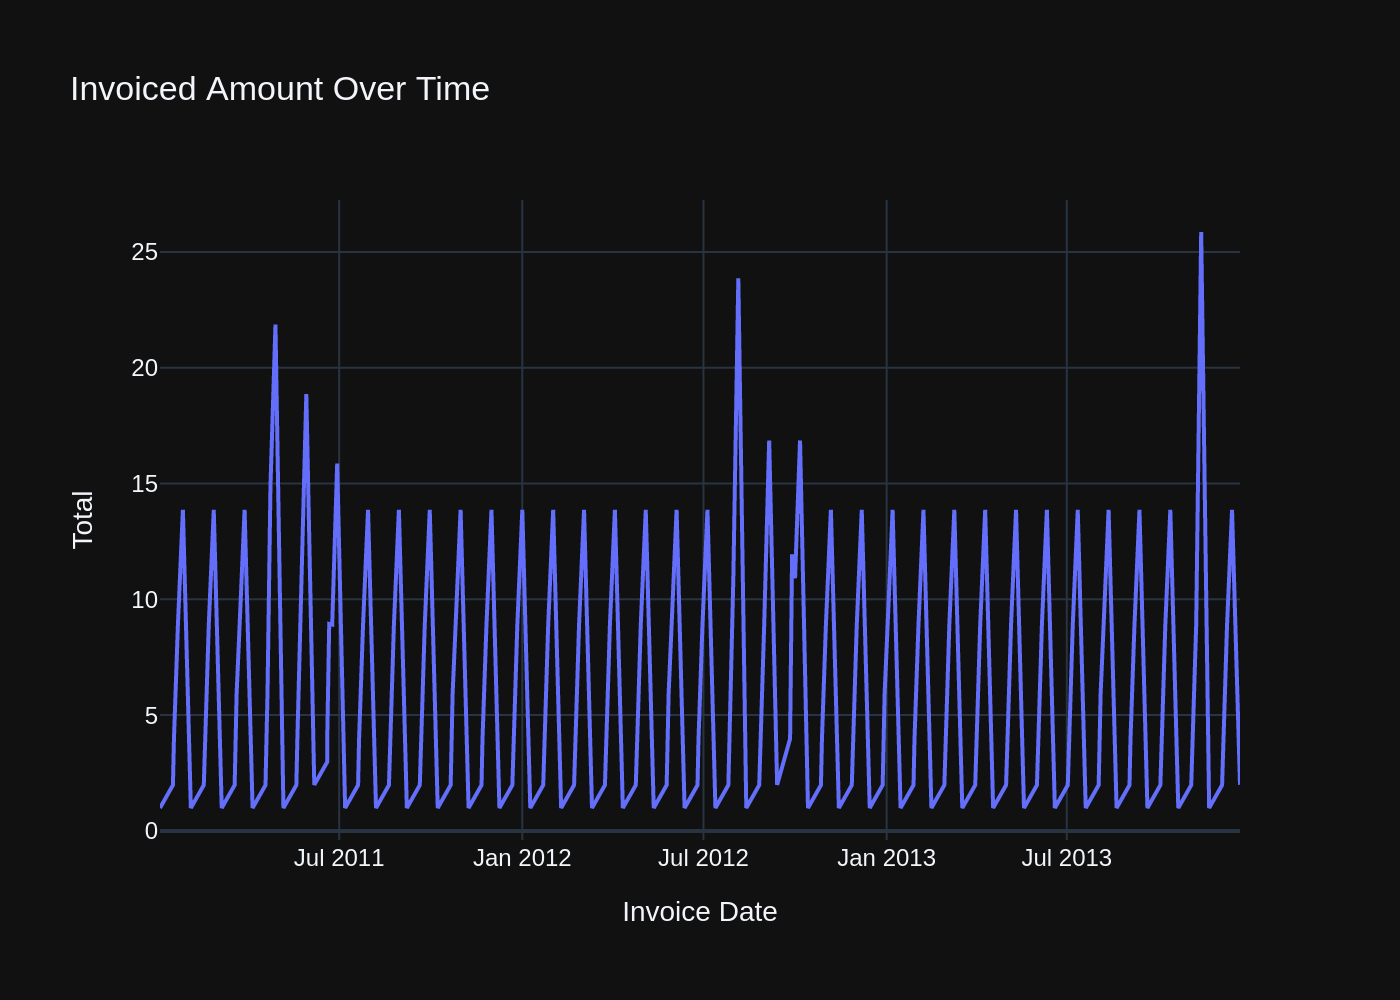

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 12:  List all employees and their reporting manager's name (if any):


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_EmployeeReportsTo ON "employees" (ReportsTo)\n\nCREATE TABLE "employees"\r\n(\r\n    EmployeeId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    FirstName NVARCHAR(20)  NOT NULL,\r\n    Title NVARCHAR(30),\r\n    ReportsTo INTEGER,\r\n    BirthDate DATETIME,\r\n    HireDate DATETIME,\r\n    Address NVARCHAR(70),\r\n    City NVARCHAR(40),\r\n    State NVARCHAR(40),\r\n    Country NVARCHAR(40),\r\n    PostalCode NVARCHAR(10),\r\n    Phone NVARCHAR(24),\r\n    Fax NVARCHAR(24),\r\n    Email NVARCHAR(60),\r\n    FOREIGN KEY (ReportsTo) REFERENCES "employees" (EmployeeId) \r\n\t\tON DELETE 

SELECT e1.FirstName AS EmployeeName, e2.FirstName AS ManagerName FROM employees e1 LEFT JOIN employees e2 ON e1.ReportsTo = e2.EmployeeId


[( DATA )]
queried dataframe


EmployeeName ManagerName
0       Andrew        None
1        Nancy      Andrew
2         Jane       Nancy
3     Margaret       Nancy
4        Steve       Nancy
5      Michael      Andrew
6       Robert     Michael
7        Laura     Michael


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all employees and their reporting manager's name (if any):'\n\nThe DataFrame was produced using this query: SELECT e1.FirstName AS EmployeeName, e2.FirstName AS ManagerName FROM employees e1 LEFT JOIN employees e2 ON e1.ReportsTo = e2.EmployeeId\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n EmployeeName    object\nManagerName     object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response 

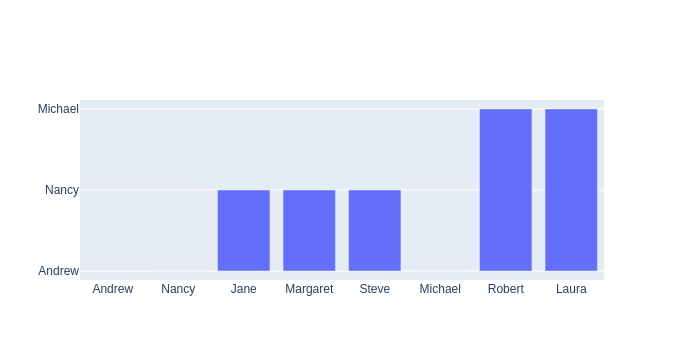


[( PYTHON )]
generated Plotly code


import plotly.graph_objects as go

def generate_plot(df):
    if len(df) == 1:
        # Create an indicator plot
        fig = go.Figure(go.Indicator(
            mode="number+delta",
            value=df['EmployeeName'].values[0],
            title={"text": "Employee Name"},
            delta={"reference": df['ManagerName'].values[0]},
            domain={'x': [0, 1], 'y': [0, 1]}
        ))
    else:
        # Create a bar chart
        fig = go.Figure(data=[
            go.Bar(name='Employees', x=df['EmployeeName'], y=df['ManagerName'])
        ])
        fig.update_layout(barmode='group')

    return fig

plot = generate_plot(df)
plot.show()

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 13:   Get the average invoice total for each customer:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_

SELECT customers.FirstName, customers.LastName, AVG(invoices.Total) AS AverageTotal FROM invoices JOIN customers ON invoices.CustomerId = customers.CustomerId GROUP BY customers.CustomerId


[( DATA )]
queried dataframe


FirstName      LastName  AverageTotal
0        Luís     Gonçalves      5.660000
1      Leonie        Köhler      5.374286
2    François      Tremblay      5.660000
3       Bjørn        Hansen      5.660000
4   František   Wichterlová      5.802857
5      Helena          Holý      7.088571
6      Astrid        Gruber      6.088571
7        Daan       Peeters      5.374286
8        Kara       Nielsen      5.374286
9     Eduardo       Martins      5.374286
10  Alexandre         Rocha      5.374286
11    Roberto       Almeida      5.374286
12   Fernanda         Ramos      5.374286
13       Mark       Philips      5.374286
14   Jennifer      Peterson      5.517143
15      Frank        Harris      5.374286
16       Jack         Smith      5.660000
17   Michelle        Brooks      5.374286
18        Tim         Goyer      5.517143
19        Dan        Miller      5.660000
20      Kathy         Chase      5.374286
21    Heather       Leacock      5.660000
22       John        Gordon      5.374286
23      Frank       Ralston      6.231429
24     Victor       Stevens      6.088571
25    Richard    Cunningham      6.802857
26    Patrick          Gray      5.374286
27      Julia       Barnett      6.231429
28     Robert         Brown      5.374286
29     Edward       Francis      5.374286
30     Martha          Silk      5.374286
31      Aaron      Mitchell      5.374286
32      Ellie      Sullivan      5.374286
33       João     Fernandes      5.660000
34   Madalena       Sampaio      5.374286
35     Hannah     Schneider      5.374286
36       Fynn    Zimmermann      6.231429
37     Niklas      Schröder      5.374286
38    Camille       Bernard      5.517143
39  Dominique      Lefebvre      5.517143
40       Marc        Dubois      5.374286
41      Wyatt        Girard      5.660000
42   Isabelle       Mercier      5.802857
43      Terhi    Hämäläinen      5.945714
44   Ladislav        Kovács      6.517143
45       Hugh      O'Reilly      6.517143
46      Lucas       Mancini      5.374286
47   Johannes  Van der Berg      5.802857
48  Stanisław        Wójcik      5.374286
49    Enrique         Muñoz      5.374286
50     Joakim     Johansson      5.517143
51       Emma         Jones      5.374286
52       Phil        Hughes      5.374286
53      Steve        Murray      5.374286
54       Mark        Taylor      5.374286
55      Diego     Gutiérrez      5.374286
56       Luis         Rojas      6.660000
57      Manoj        Pareek      5.517143
58       Puja    Srivastava      6.106667


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: ' Get the average invoice total for each customer:'\n\nThe DataFrame was produced using this query: SELECT customers.FirstName, customers.LastName, AVG(invoices.Total) AS AverageTotal FROM invoices JOIN customers ON invoices.CustomerId = customers.CustomerId GROUP BY customers.CustomerId\n\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n FirstName        object\nLastName         object\nAverageTotal    float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answ

import plotly.graph_objects as go

# Check if there's more than one customer to determine which chart to create
if df.shape[0] > 1:
    fig = go.Figure()
    
    for index, row in df.iterrows():
        name = f"{row['FirstName']} {row['LastName']}"
        average_total = row['AverageTotal']
        
        # Create a bar with the customer's name and average total
        fig.add_trace(go.Bar(
            x=[name],
            y=[average_total],
            name=name,
            text=f"${average_total:.2f}",
            textposition='auto'
        ))
    
    fig.update_layout(
        title="Average Invoice Total by Customer",
        xaxis_title="Customer",
        yaxis_title="Average Total ($)",
        barmode='group'
    )
else:
    # If there's only one customer, use an Indicator
    name = f"{df['FirstName'].values[0]} {df['LastName'].values[0]}"
    average_total = df['AverageTotal'].values[0]
    
    fig = go.Figure(go.Indicator(
        mode="gauge+number",
        value=average_total,
        title={'text': "Average Invoice Total for<br>Customer"},
        domain={'x': [0, 1], 'y': [0, 1]},
        gauge={
            'axis': {'range': [None, max(df['AverageTotal'].values) * 2]},
            'bar': {'color': "darkblue"},
            'steps': [
                {'range': [0, average_total], 'color': 'lightgreen'},
                {'range': [average_total, max(df['AverageTotal'].values)], 'color': 'red'}
            ],
        },
        number={'valueformat': '$.2f'}
    ))

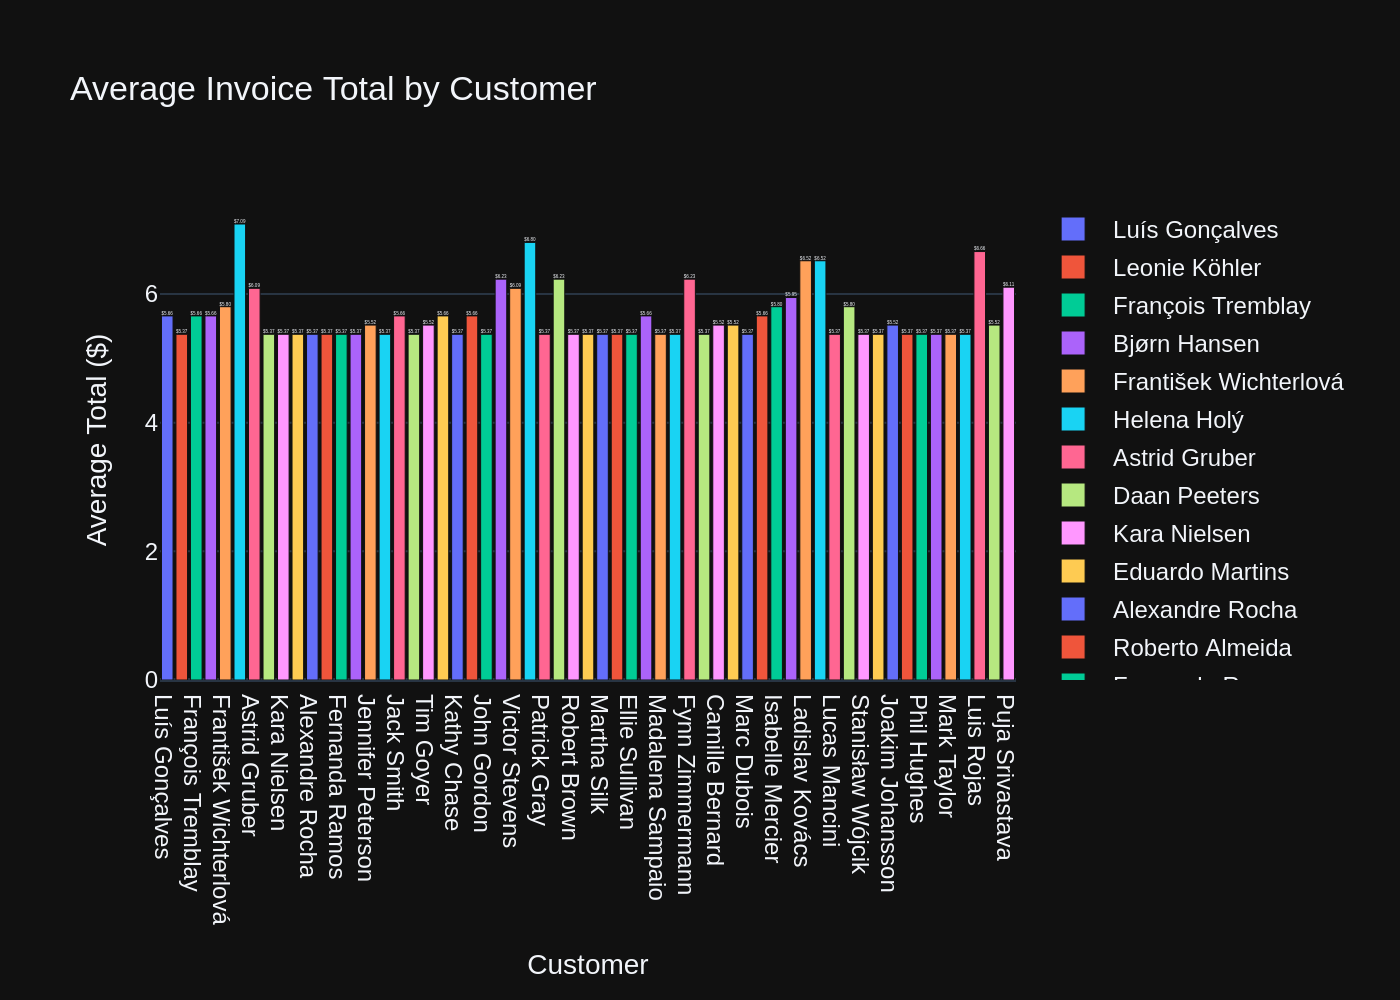

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 14:  Find the top 5 most expensive tracks (based on unit price):


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACT

SELECT * FROM tracks ORDER BY UnitPrice DESC LIMIT 5


[( DATA )]
queried dataframe


TrackId                                    Name  AlbumId  MediaTypeId  \
0     2819  Battlestar Galactica: The Story So Far      226            3   
1     2820                  Occupation / Precipice      227            3   
2     2821                           Exodus, Pt. 1      227            3   
3     2822                           Exodus, Pt. 2      227            3   
4     2823                           Collaborators      227            3   

   GenreId Composer  Milliseconds       Bytes  UnitPrice  
0       18     None       2622250   490750393       1.99  
1       19     None       5286953  1054423946       1.99  
2       19     None       2621708   475079441       1.99  
3       19     None       2618000   466820021       1.99  
4       19     None       2626626   483484911       1.99


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the top 5 most expensive tracks (based on unit price):'\n\nThe DataFrame was produced using this query: SELECT * FROM tracks ORDER BY UnitPrice DESC LIMIT 5\n\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n TrackId           int64\nName             object\nAlbumId           int64\nMediaTypeId       int64\nGenreId           int64\nComposer         object\nMilliseconds      int64\nBytes             int64\nUnitPrice       float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only 

import plotly.graph_objects as go

# Check if the DataFrame has more than one row
if len(df) > 1:
    # Create a bar chart
    fig = go.Figure(data=[go.Bar(x=df['Name'], y=df['UnitPrice'])])
    fig.update_layout(title='Top 5 Most Expensive Tracks')
else:
    # Create an indicator
    value = df.iloc[0]['UnitPrice']
    title = 'Most Expensive Track'
    fig = go.Figure(go.Indicator(
        mode="number+gauge",
        gauge={'shape': "bullet"},
        value=value,
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': title},
        number={'valueformat': '$,.2f'},
    ))

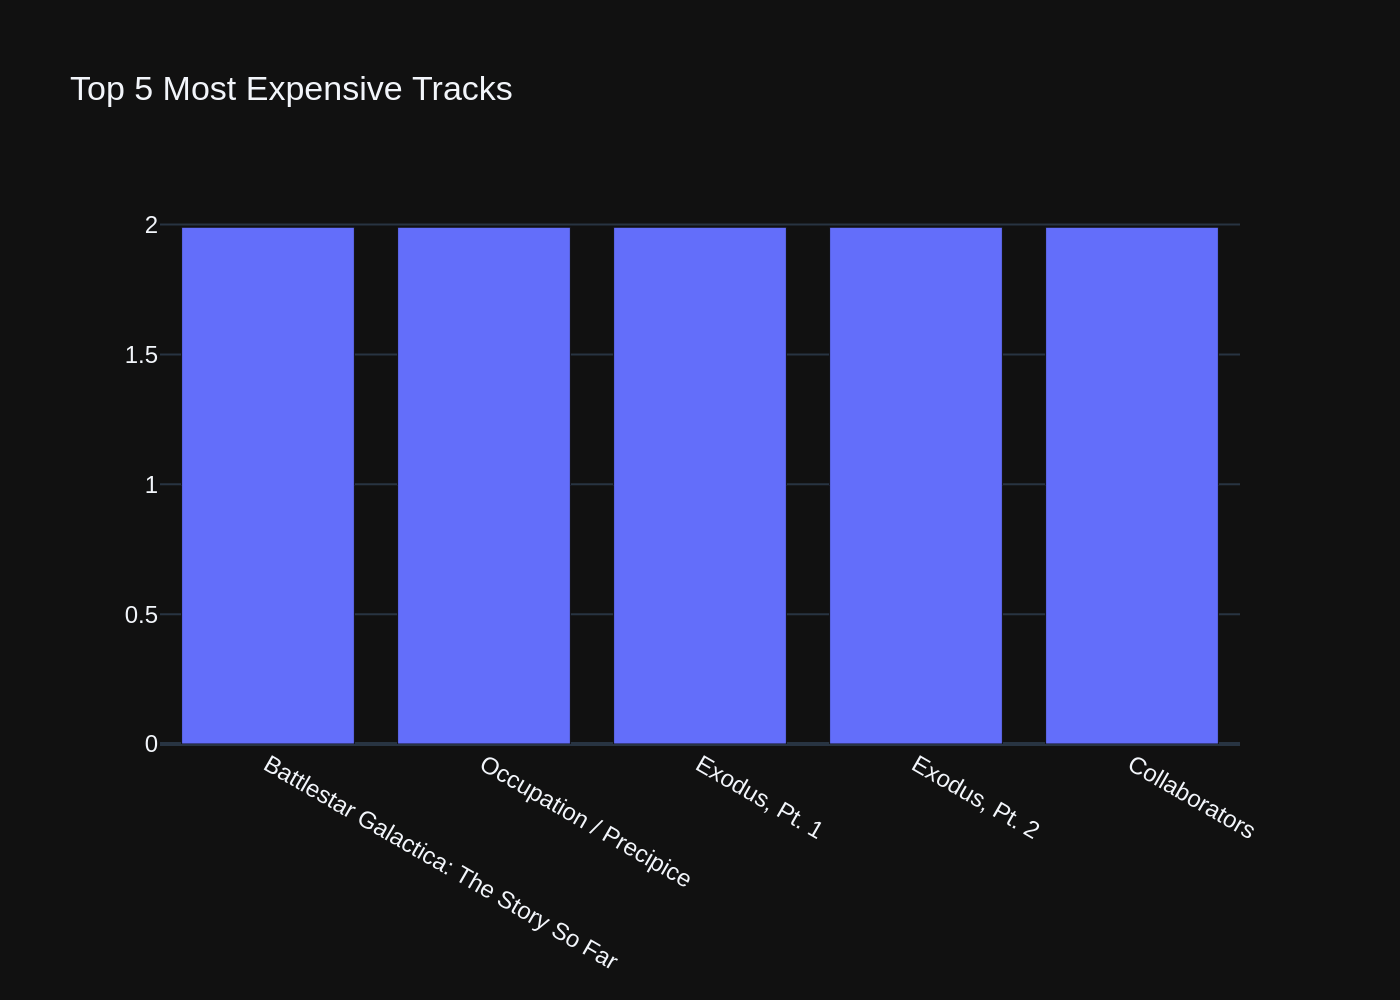

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 15:  List all genres and the number of tracks in each genre:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION 

SELECT g.Name, COUNT(t.GenreID) as TrackCount FROM genres g JOIN tracks t ON g.GenreId = t.GenreId GROUP BY g.GenreId


[( DATA )]
queried dataframe


Name  TrackCount
0                 Rock        1297
1                 Jazz         130
2                Metal         374
3   Alternative & Punk         332
4        Rock And Roll          12
5                Blues          81
6                Latin         579
7               Reggae          58
8                  Pop          48
9           Soundtrack          43
10          Bossa Nova          15
11      Easy Listening          24
12         Heavy Metal          28
13            R&B/Soul          61
14   Electronica/Dance          30
15               World          28
16         Hip Hop/Rap          35
17     Science Fiction          13
18            TV Shows          93
19    Sci Fi & Fantasy          26
20               Drama          64
21              Comedy          17
22         Alternative          40
23           Classical          74
24               Opera           1


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all genres and the number of tracks in each genre:'\n\nThe DataFrame was produced using this query: SELECT g.Name, COUNT(t.GenreID) as TrackCount FROM genres g JOIN tracks t ON g.GenreId = t.GenreId GROUP BY g.GenreId\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n Name          object\nTrackCount     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'codegeex4:latest',

import plotly.express as px

if len(df) == 1:
    # Create an indicator chart for a single genre
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['TrackCount'].values[0],
        title={'text': df['Name'].values[0]},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))
else:
    # Create a bar chart for multiple genres
    fig = px.bar(df, x='Name', y='TrackCount', title='Number of Tracks in Each Genre')

fig.update_layout(yaxis=dict(title='Number of Tracks'), xaxis=dict(title='Genre'))

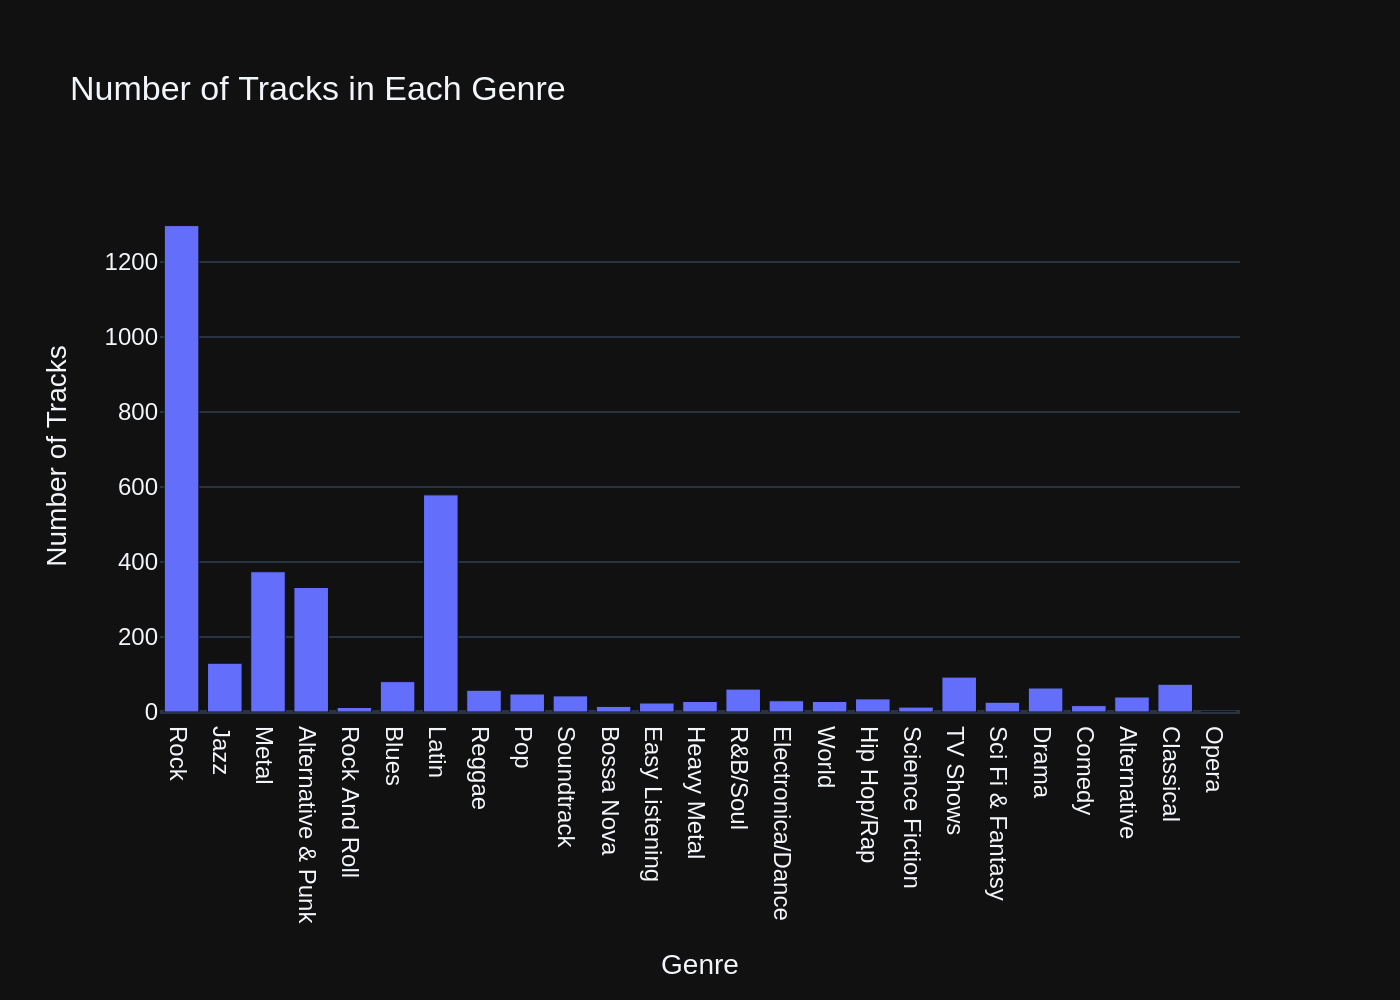

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 16:  Get all genres that do not have any tracks associated with them:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON "tracks" (GenreId)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REF

SELECT * FROM genres WHERE GenreId NOT IN (SELECT GenreId FROM tracks)


[( DATA )]
queried dataframe


Empty DataFrame
Columns: [GenreId, Name]
Index: []

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 17:  List all customers who have not placed any orders:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(

SELECT * FROM customers WHERE CustomerId NOT IN (SELECT CustomerId FROM invoices)


[( DATA )]
queried dataframe


Empty DataFrame
Columns: [CustomerId, FirstName, LastName, Company, Address, City, State, Country, PostalCode, Phone, Fax, Email, SupportRepId]
Index: []

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 18:   
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FORE

SELECT a.Name AS ArtistName, COUNT(t.TrackId) AS TrackCount FROM tracks t JOIN albums al ON t.AlbumId = al.AlbumId JOIN artists a ON al.ArtistId = a.ArtistId GROUP BY a.ArtistId ORDER BY TrackCount DESC LIMIT 10


[( DATA )]
queried dataframe


ArtistName  TrackCount
0      Iron Maiden         213
1               U2         135
2     Led Zeppelin         114
3        Metallica         112
4      Deep Purple          92
5             Lost          92
6        Pearl Jam          67
7    Lenny Kravitz          57
8  Various Artists          56
9       The Office          53


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: ' \n        Can you find the top 10 most popular artists based on the number of tracks?\n        Hint: There are 3 tables - artists, albums and tracks, \n        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,\n    '\n\nThe DataFrame was produced using this query: SELECT a.Name AS ArtistName, COUNT(t.TrackId) AS TrackCount FROM tracks t JOIN albums al ON t.AlbumId = al.AlbumId JOIN artists a ON al.ArtistId = a.ArtistId GROUP BY a.ArtistId ORDER BY TrackCount DESC LIMIT 10\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n ArtistName    object\nTrackCount     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code t

import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number+gauge",
        value=df.iloc[0]['TrackCount'],
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': df.iloc[0]['ArtistName']},
        gauge={
            'axis': {'range': [None, max(df['TrackCount'])]},
            'steps': [
                {'range': [0, 20000000], 'color': "lightgray"},
                {'range': [20000000, 40000000], 'color': "gray"}
            ],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': df.iloc[0]['TrackCount']
            }
        }))
else:
    fig = go.Figure(data=[go.Bar(x=df['ArtistName'], y=df['TrackCount'])])
    fig.update_layout(title_text='Top 10 Most Popular Artists Based on Number of Tracks')

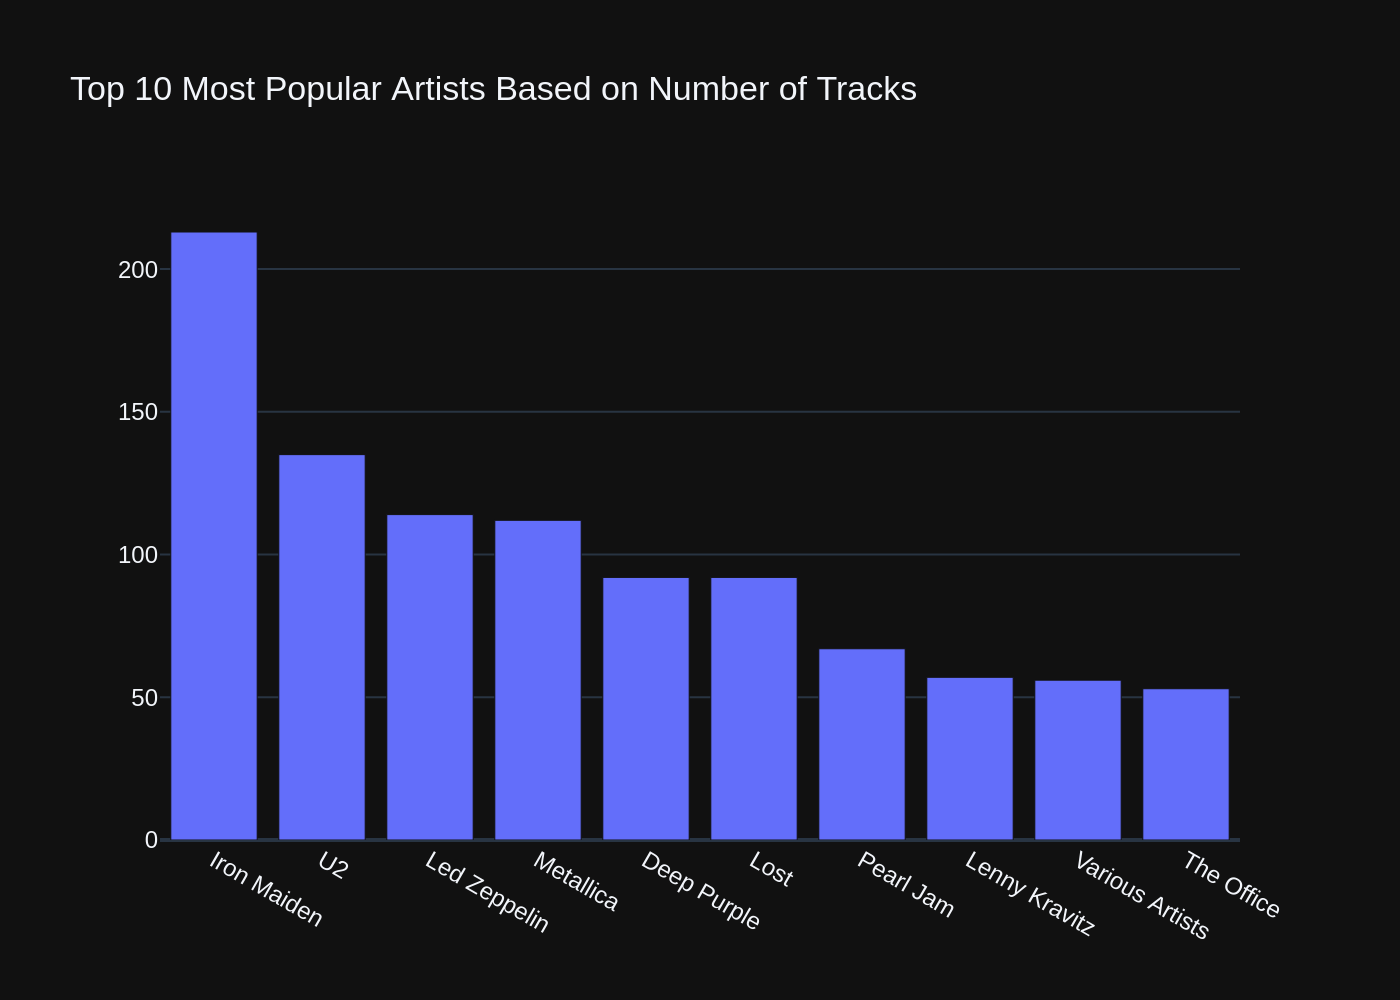

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 19:  List all customers from Canada and their email addresses:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_CustomerSupportRepId ON "customers" (SupportRepId)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    Company NVARCHAR(80),\r\n    Address NVARCHAR(70),\r\n    City NVARCHAR(40),\r\n    State NVARCHAR(40),\r\n    Country NVARCHAR(40),\r\n    PostalCode NVARCHAR(10),\r\n    Phone NVARCHAR(24),\r\n    Fax NVARCHAR(24),\r\n    Email NVARCHAR(60)  NOT NULL,\r\n    SupportRepId INTEGER,\r\n    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\

SELECT * FROM customers WHERE Country = 'Canada'


[( DATA )]
queried dataframe


CustomerId FirstName  LastName        Company                 Address  \
0           3  François  Tremblay           None       1498 rue Bélanger   
1          14      Mark   Philips          Telus          8210 111 ST NW   
2          15  Jennifer  Peterson  Rogers Canada     700 W Pender Street   
3          29    Robert     Brown           None  796 Dundas Street West   
4          30    Edward   Francis           None        230 Elgin Street   
5          31    Martha      Silk           None   194A Chain Lake Drive   
6          32     Aaron  Mitchell           None      696 Osborne Street   
7          33     Ellie  Sullivan           None          5112 48 Street   

          City State Country PostalCode              Phone                Fax  \
0     Montréal    QC  Canada    H2G 1A7  +1 (514) 721-4711               None   
1     Edmonton    AB  Canada    T6G 2C7  +1 (780) 434-4554  +1 (780) 434-5565   
2    Vancouver    BC  Canada    V6C 1G8  +1 (604) 688-2255  +1 (604) 688-8756   
3      Toronto    ON  Canada    M6J 1V1  +1 (416) 363-8888               None   
4       Ottawa    ON  Canada    K2P 1L7  +1 (613) 234-3322               None   
5      Halifax    NS  Canada    B3S 1C5  +1 (902) 450-0450               None   
6     Winnipeg    MB  Canada    R3L 2B9  +1 (204) 452-6452               None   
7  Yellowknife    NT  Canada    X1A 1N6  +1 (867) 920-2233               None   

                    Email  SupportRepId  
0     ftremblay@gmail.com             3  
1      mphilips12@shaw.ca             5  
2     jenniferp@rogers.ca             3  
3        robbrown@shaw.ca             3  
4     edfrancis@yachoo.ca             3  
5    marthasilk@gmail.com             5  
6  aaronmitchell@yahoo.ca             4  
7  ellie.sullivan@shaw.ca             3


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all customers from Canada and their email addresses:'\n\nThe DataFrame was produced using this query: SELECT * FROM customers WHERE Country = 'Canada'\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId       int64\nFirstName       object\nLastName        object\nCompany         object\nAddress         object\nCity            object\nState           object\nCountry         object\nPostalCode      object\nPhone           object\nFax             object\nEmail           object\nSupportRepId     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If t

import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Check if there is only one value in the dataframe
if len(df) == 1:
    # Plot an indicator chart
    fig.add_trace(go.Indicator(
        mode="number",
        value=df['Email'].iloc[0],
        title={
            "text": df['FirstName'].iloc[0] + ' ' + df['LastName'].iloc[0]
        },
        domain={"row": 0, "column": 0}
    ))
else:
    # Plot a bar chart
    fig.add_trace(go.Bar(
        x=df['FirstName'] + ' ' + df['LastName'],
        y=df['Email']
    ))

# Update layout if necessary
fig.update_layout(title='Customer Emails')

# Show the plot

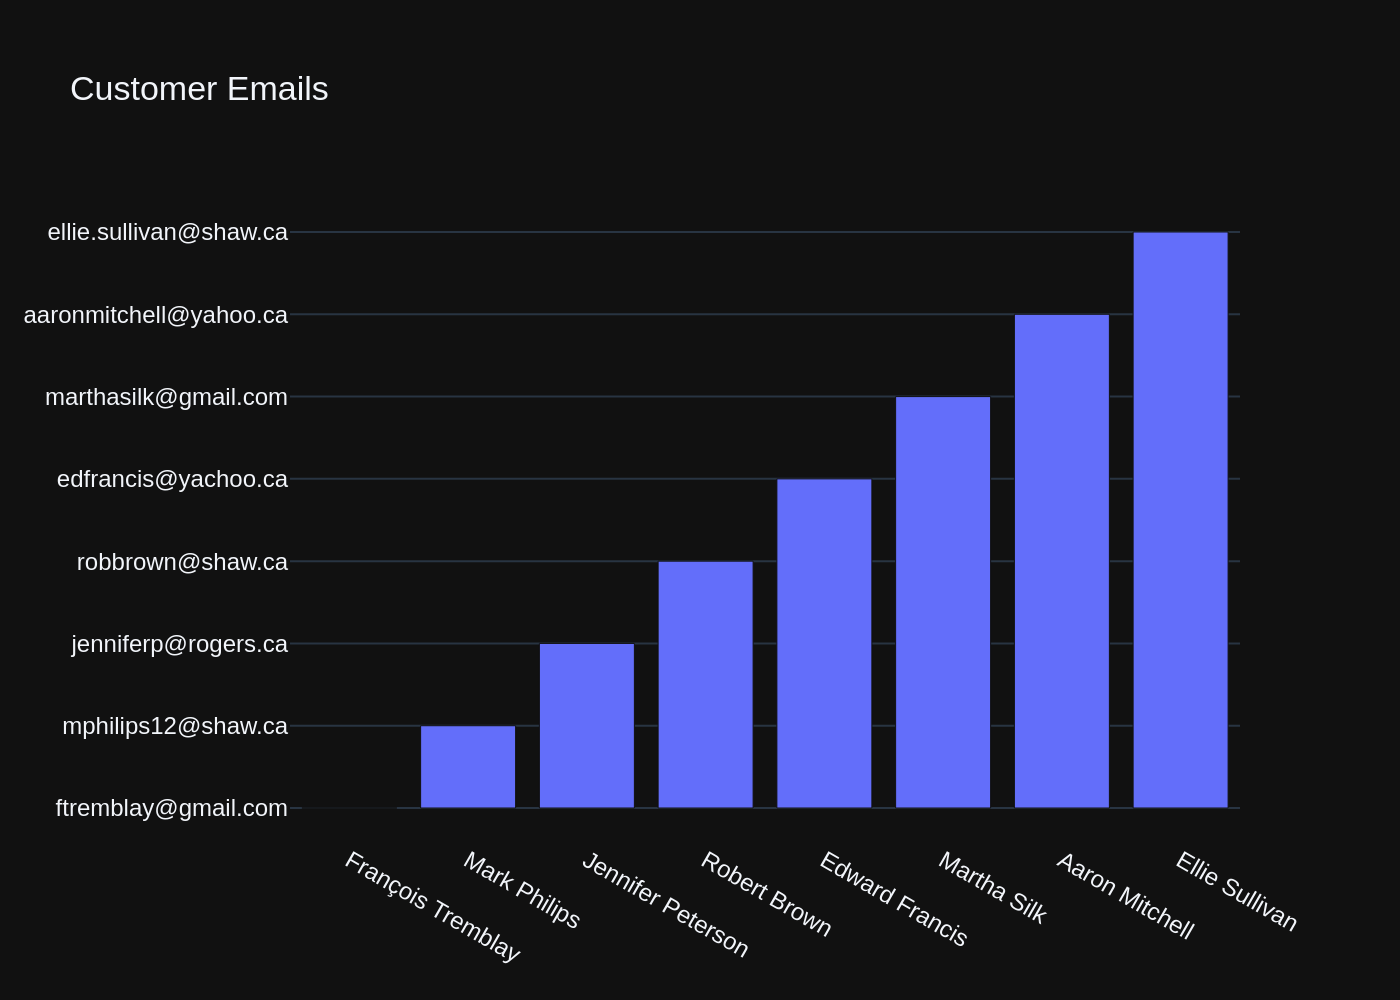

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 20:  Find the customer with the most invoices 


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_items"\r

SELECT customers.FirstName, customers.LastName, COUNT(*) as TotalInvoices FROM invoices JOIN customers ON invoices.CustomerId = customers.CustomerId GROUP BY customers.CustomerId ORDER BY TotalInvoices DESC LIMIT 1


[( DATA )]
queried dataframe


FirstName   LastName  TotalInvoices
0      Luís  Gonçalves              7


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the customer with the most invoices '\n\nThe DataFrame was produced using this query: SELECT customers.FirstName, customers.LastName, COUNT(*) as TotalInvoices FROM invoices JOIN customers ON invoices.CustomerId = customers.CustomerId GROUP BY customers.CustomerId ORDER BY TotalInvoices DESC LIMIT 1\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n FirstName        object\nLastName         object\nTotalInvoices     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python cod

import plotly.graph_objects as go

if df.shape[0] == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['TotalInvoices'].values[0],
        title={'text': "Customer with Most Invoices"},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))
else:
    fig = go.Figure(data=[go.Bar(x=df['FirstName'] + " " + df['LastName'], y=df['TotalInvoices'])])
    fig.update_layout(title='Customer with Most Invoices')
    fig.update_xaxes(categoryorder="total descending")

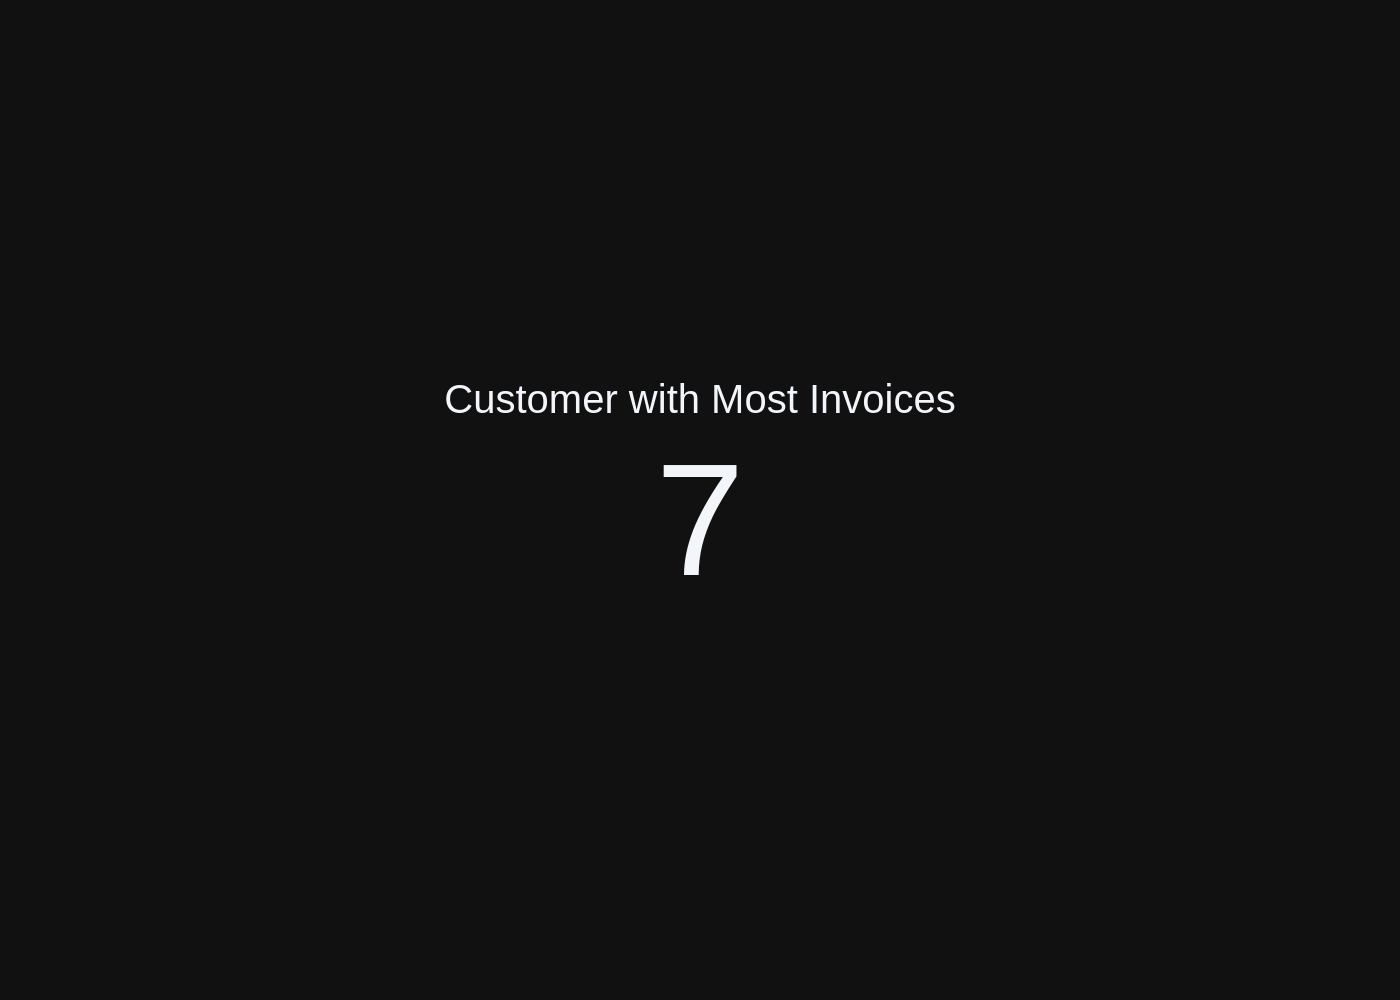

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 21:  Find the customer who bought the most albums in total quantity (across all invoices):


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId

SELECT customers.FirstName, customers.LastName, COUNT(*) as TotalAlbums FROM invoices i JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId JOIN tracks t ON ii.TrackId = t.TrackId JOIN customers ON i.CustomerId = customers.CustomerId GROUP BY customers.CustomerId ORDER BY TotalAlbums DESC LIMIT 1


[( DATA )]
queried dataframe


FirstName   LastName  TotalAlbums
0      Luís  Gonçalves           38


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the customer who bought the most albums in total quantity (across all invoices):'\n\nThe DataFrame was produced using this query: SELECT customers.FirstName, customers.LastName, COUNT(*) as TotalAlbums FROM invoices i JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId JOIN tracks t ON ii.TrackId = t.TrackId JOIN customers ON i.CustomerId = customers.CustomerId GROUP BY customers.CustomerId ORDER BY TotalAlbums DESC LIMIT 1\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n FirstName      object\nLastName       object\nTotalAlbums     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in 

import plotly.graph_objects as go

# Check if there's only one row in the DataFrame
if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number+gauge",
        value=df['TotalAlbums'].values[0],
        title={'text': "Customer Albums"},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))
else:
    fig = go.Figure(data=[go.Bar(x=df['LastName'], y=df['TotalAlbums'])])

fig.update_layout(
    xaxis=dict(title='Last Name'),
    yaxis=dict(title='Total Albums')
)

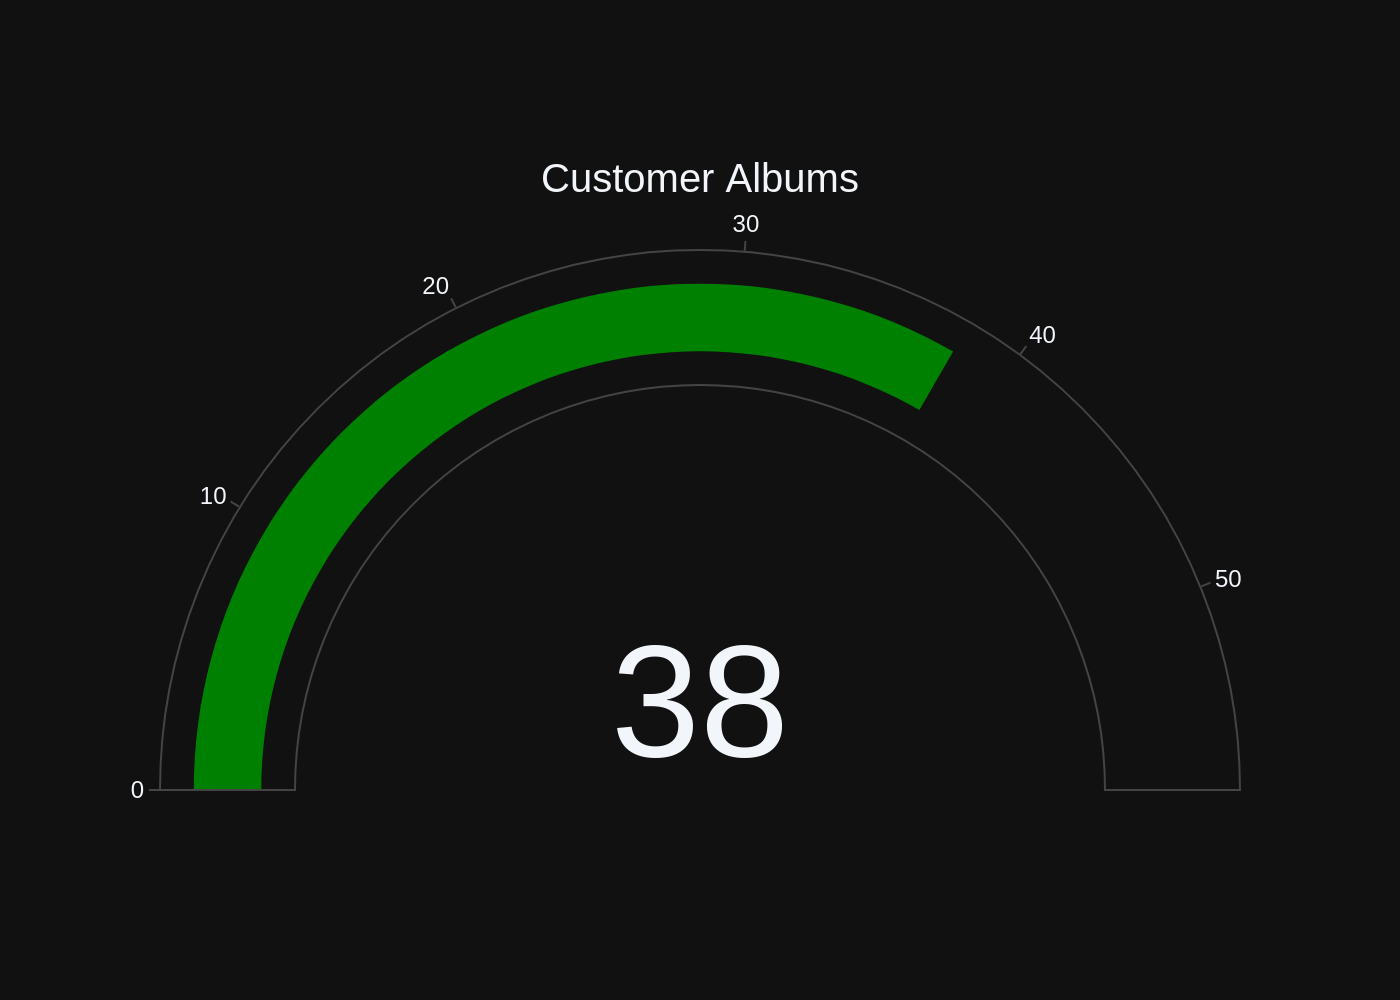

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 22:        
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r\n    FOREIGN KEY (InvoiceId) REFERENCES "invoices" (InvoiceId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCR

SELECT c.FirstName, c.LastName, COUNT(*) as AlbumCount FROM customers c JOIN invoices i ON c.CustomerId = i.CustomerId JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId WHERE ii.Quantity > 0 GROUP BY c.CustomerId ORDER BY AlbumCount DESC LIMIT 5


[( DATA )]
queried dataframe


FirstName     LastName  AlbumCount
0       Luís    Gonçalves          38
1     Leonie       Köhler          38
2   François     Tremblay          38
3      Bjørn       Hansen          38
4  František  Wichterlová          38


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: '      \n        Find the top 5 customers who bought the most albums in total quantity (across all invoices):\n        Hint: album quantity is found in invoice_items, \n    '\n\nThe DataFrame was produced using this query: SELECT c.FirstName, c.LastName, COUNT(*) as AlbumCount FROM customers c JOIN invoices i ON c.CustomerId = i.CustomerId JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId WHERE ii.Quantity > 0 GROUP BY c.CustomerId ORDER BY AlbumCount DESC LIMIT 5\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n FirstName     object\nLastName      object\nAlbumCount     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the

import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['AlbumCount'].iloc[0],
        title={"text": "Top Customer"},
        domain={'x': [0, 1], 'y': [0, 1]}))
else:
    df['FullName'] = df['FirstName'] + ' ' + df['LastName']
    fig = go.Figure(go.Bar(
        x=df['AlbumCount'],
        y=df['FullName'].values[::-1],
        orientation='h',
        textposition='auto'))
    
fig.update_layout(title_text='Top 5 Customers by Album Quantity')

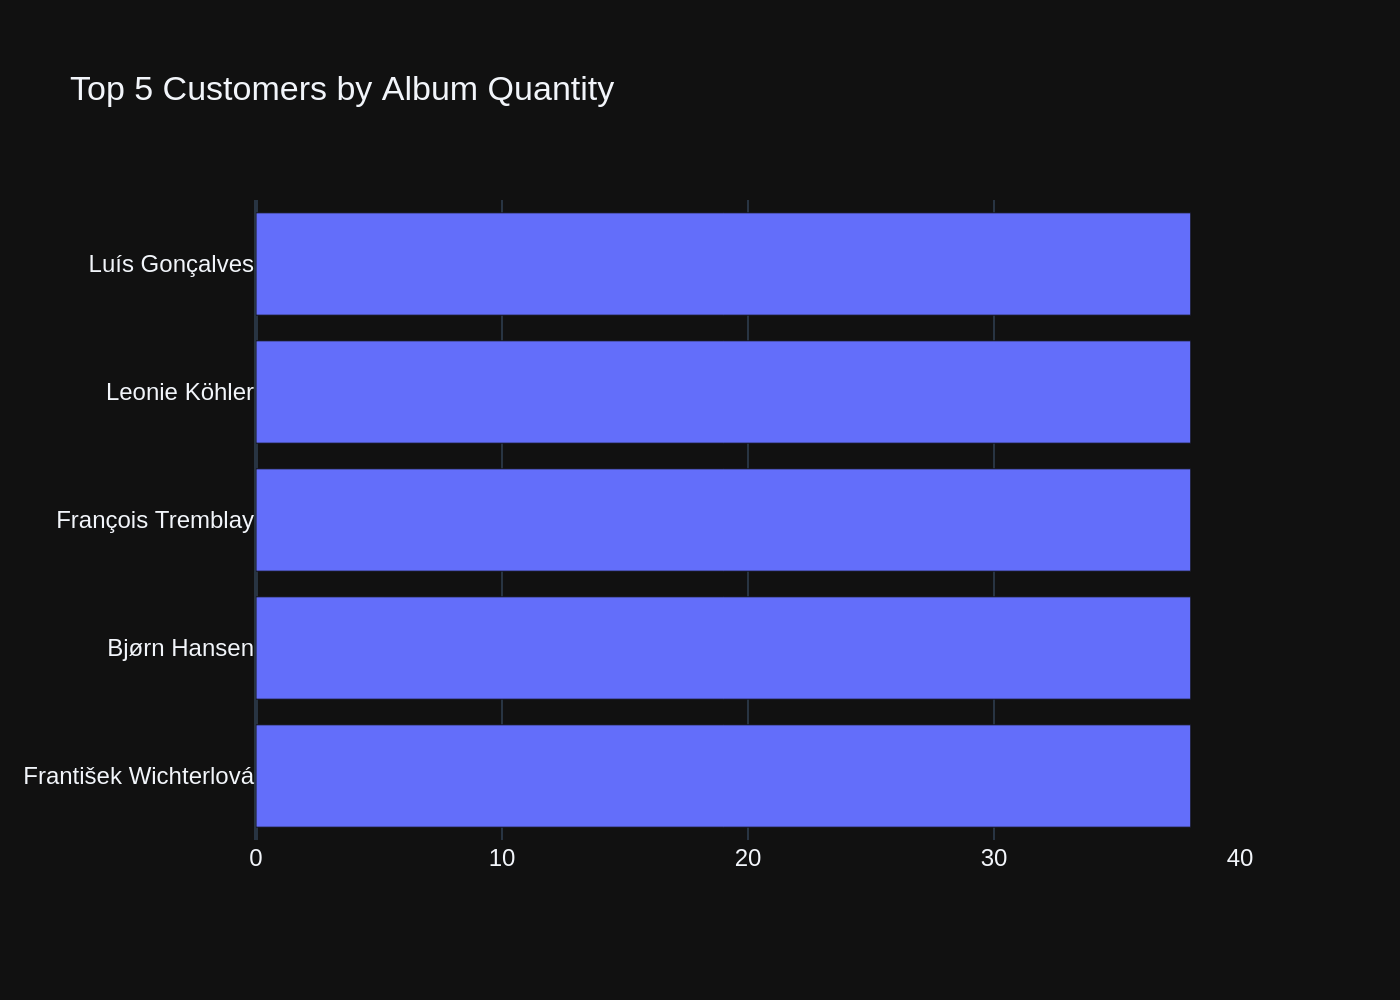

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 23:    
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABL

SELECT c.FirstName, c.LastName, SUM(i.Total) AS TotalSpent FROM invoices i JOIN customers c ON i.CustomerId = c.CustomerId GROUP BY c.CustomerId ORDER BY TotalSpent DESC LIMIT 5


[( DATA )]
queried dataframe


FirstName    LastName  TotalSpent
0    Helena        Holý       49.62
1   Richard  Cunningham       47.62
2      Luis       Rojas       46.62
3  Ladislav      Kovács       45.62
4      Hugh    O'Reilly       45.62


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: '  \n         Find the top 5 customers who spent the most money overall,  \n         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary \n    '\n\nThe DataFrame was produced using this query: SELECT c.FirstName, c.LastName, SUM(i.Total) AS TotalSpent FROM invoices i JOIN customers c ON i.CustomerId = c.CustomerId GROUP BY c.CustomerId ORDER BY TotalSpent DESC LIMIT 5\n\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n FirstName      object\nLastName       object\nTotalSpent    float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a p

import plotly.graph_objects as go

def create_plot(df):
    if len(df) == 1:
        fig = go.Figure(go.Indicator(
            mode="gauge+number",
            value=df['TotalSpent'].values[0],
            title={'text': "Top Customer"},
            domain={'x': [0, 1], 'y': [0, 1]},
            gauge={
                'axis': {'range': [None, df['TotalSpent'].max()]},
                'bar': {'color': "darkblue"}
            }
        ))
    else:
        fig = go.Figure(data=[
            go.Bar(
                x=df['FirstName'] + ' ' + df['LastName'],
                y=df['TotalSpent']
            )
        ])
        fig.update_layout(title_text="Top 5 Customers", xaxis_tickangle=-45)

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 24:  Get all playlists containing at least 10 tracks and the total duration of those tracks:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_PlaylistTrackTrackId ON "playlist_track" (TrackId)\n\nCREATE TABLE "playlists"\r\n(\r\n    PlaylistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "playlist_track"\r\n(\r\n    PlaylistId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    CONSTRAINT PK_PlaylistTrack PRIMARY KEY  (PlaylistId, TrackId),\r\n    FOREIGN KEY (PlaylistId) REFERENCES "playlists" (PlaylistId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"

SELECT p.Name, SUM(t.Milliseconds) AS TotalDuration FROM playlists p JOIN playlist_track pt ON p.PlaylistId = pt.PlaylistId JOIN tracks t ON pt.TrackId = t.TrackId GROUP BY p.PlaylistId HAVING COUNT(*) >= 10


[( DATA )]
queried dataframe


Name  TotalDuration
0                        Music      877683083
1                     TV Shows      501094957
2                   90’s Music      398705153
3                        Music      877683083
4                     TV Shows      501094957
5              Brazilian Music        9486559
6                    Classical       21770592
7    Classical 101 - Deep Cuts        6755730
8   Classical 101 - Next Steps        7575051
9   Classical 101 - The Basics        7439811
10                      Grunge        4122018
11         Heavy Metal Classic        8206312


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Get all playlists containing at least 10 tracks and the total duration of those tracks:'\n\nThe DataFrame was produced using this query: SELECT p.Name, SUM(t.Milliseconds) AS TotalDuration FROM playlists p JOIN playlist_track pt ON p.PlaylistId = pt.PlaylistId JOIN tracks t ON pt.TrackId = t.TrackId GROUP BY p.PlaylistId HAVING COUNT(*) >= 10\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n Name             object\nTotalDuration     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with o

import plotly.express as px

# Check if there are multiple playlists or not
if len(df) > 1:
    fig = px.bar(df, x='Name', y='TotalDuration', title="Playlists with at Least 10 Tracks and Their Total Durations")
else:
    fig = go.Figure(go.Indicator(
        mode = "number",
        value = df['TotalDuration'].iloc[0],
        title = {"text": "<span style='font-size:40px'><b>{}</b></span><br><span style='font-size:20px'>Total Duration</span>".format(df['Name'].iloc[0])},
        domain = {'x': [0,1], 'y': [0,1]}
    ))

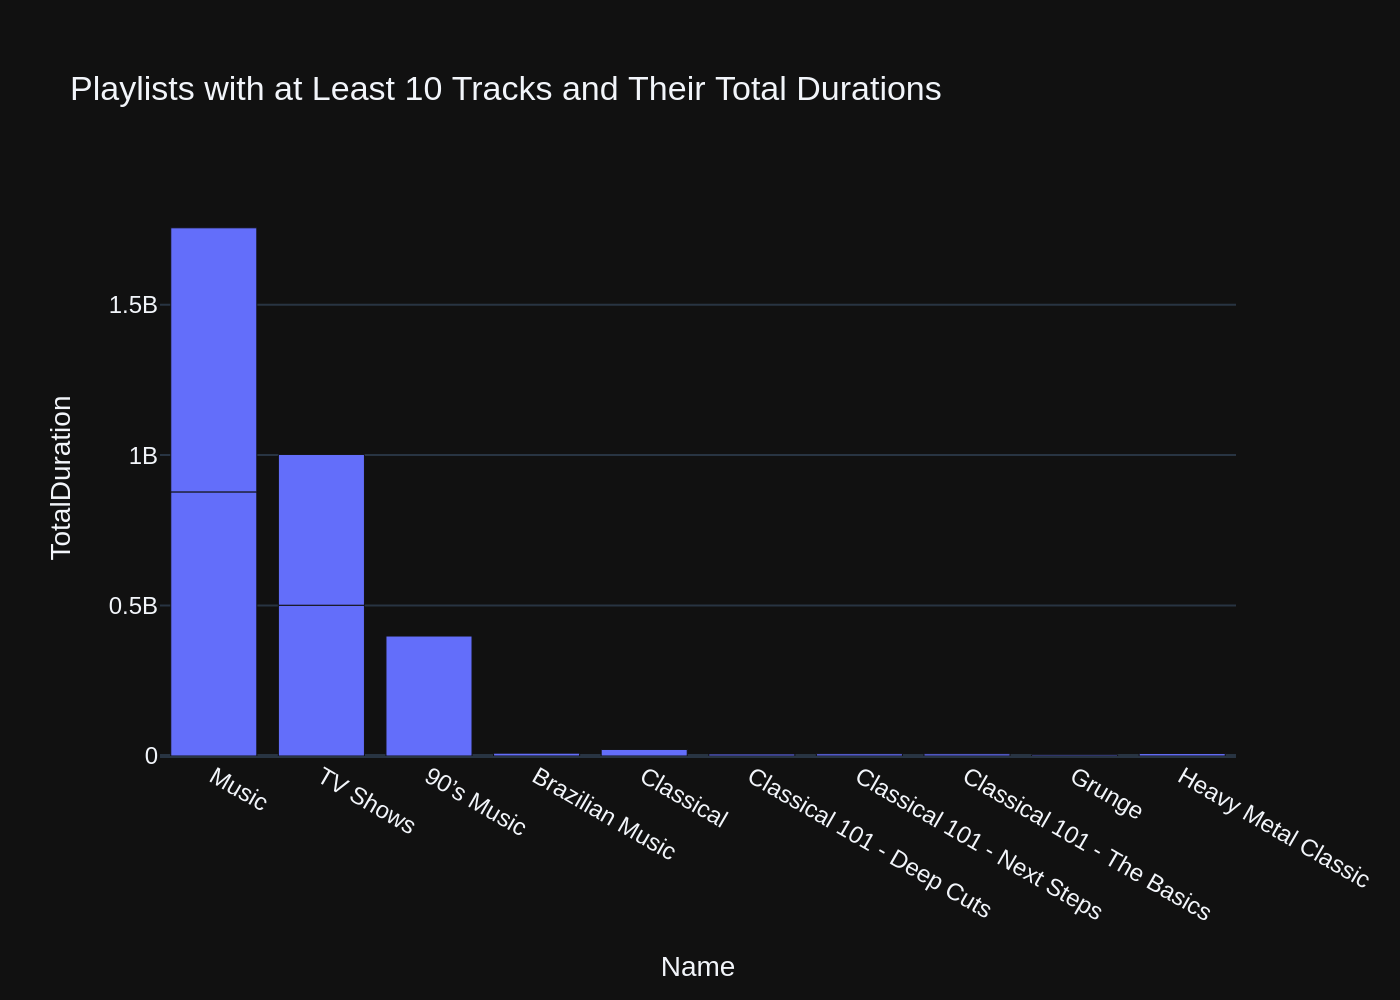

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 25:  Identify artists who have albums with tracks appearing in multiple genres:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tO

SELECT a.Name AS ArtistName, g1.Name AS Genre1, g2.Name AS Genre2 FROM artists a JOIN albums al ON a.ArtistId = al.ArtistId JOIN tracks t1 ON t1.AlbumId = al.AlbumId JOIN genres g1 ON g1.GenreId = t1.GenreId JOIN tracks t2 ON t2.AlbumId = al.AlbumId JOIN genres g2 ON g2.GenreId = t2.GenreId WHERE g1.Name != g2.Name


[( DATA )]
queried dataframe


ArtistName  Genre1    Genre2
0     Eric Clapton   Blues     Latin
1     Eric Clapton   Blues     Latin
2     Eric Clapton   Blues     Latin
3     Eric Clapton   Blues     Latin
4     Eric Clapton   Blues     Latin
...            ...     ...       ...
3707    The Office  Comedy  TV Shows
3708    The Office  Comedy  TV Shows
3709    The Office  Comedy  TV Shows
3710    The Office  Comedy  TV Shows
3711    The Office  Comedy  TV Shows

[3712 rows x 3 columns]


[Ollama parameters]
model=codegeex4:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Identify artists who have albums with tracks appearing in multiple genres:'\n\nThe DataFrame was produced using this query: SELECT a.Name AS ArtistName, g1.Name AS Genre1, g2.Name AS Genre2 FROM artists a JOIN albums al ON a.ArtistId = al.ArtistId JOIN tracks t1 ON t1.AlbumId = al.AlbumId JOIN genres g1 ON g1.GenreId = t1.GenreId JOIN tracks t2 ON t2.AlbumId = al.AlbumId JOIN genres g2 ON g2.GenreId = t2.GenreId WHERE g1.Name != g2.Name\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n ArtistName    object\nGenre1        object\nGenre2        object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data i

import plotly.graph_objects as go

# Check if there are multiple rows in the DataFrame
if df.shape[0] > 1:
    # Create a bar chart to display the results
    fig = go.Figure(data=[
        go.Bar(name='Genre1', x=df['ArtistName'], y=df['Genre1']),
        go.Bar(name='Genre2', x=df['ArtistName'], y=df['Genre2'])
    ])
    # Update layout
    fig.update_layout(barmode='group', title_text='Artists with Albums in Multiple Genres')
else:
    # Create an indicator if there is only one row in the DataFrame
    fig = go.Figure(go.Indicator(
        mode="number+gauge",
        value=df['Genre1'].iloc[0],
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': df['ArtistName'].iloc[0]}
    ))

# Show the figure

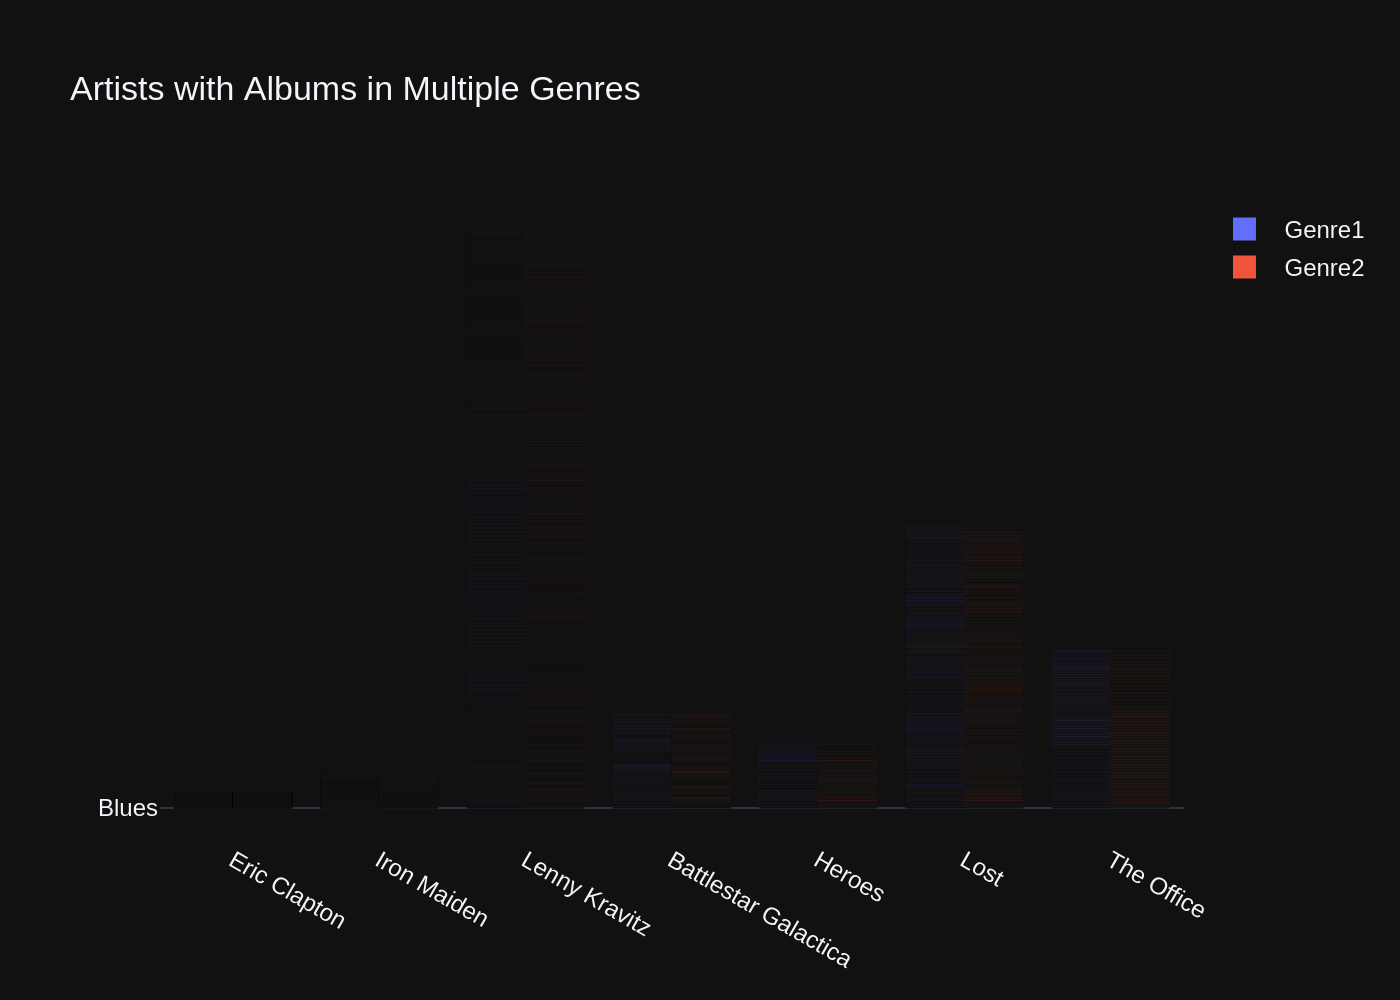

In [15]:
for n, question in enumerate(questions):
    # if n != 4: continue
    
    if n > 5: continue

    vn.ask_adaptive(question=question, tag_id=n+2, allow_llm_to_see_data=allow_llm_to_see_data)
    
    # my_vn_ask(question=question, tag_id=n+2, allow_llm_to_see_data=allow_llm_to_see_data)

### Check completion time

In [16]:
ts_stop = time()
elapsed_time = ts_stop - ts_start
str_elapsed_sec = f"{elapsed_time:.0f}"
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"Completed testing:\n================\n LLM model '{model_name}' \n took {str_elapsed_sec} sec\n run on '{hostname}' \n at {ts}")

Completed testing:
 LLM model 'codegeex4' 
 took 3928 sec
 run on 'ducklover1' 
 at 20241013-113823


In [17]:
file_csv = f"training_data-{model_name}-{str_elapsed_sec}s-{hostname}-{ts}.csv"
file_csv

'training_data-codegeex4-3928s-ducklover1-20241013-113823.csv'

### Save training data

In [18]:
# show training data
df_training_data = vn.get_training_data()
df_training_data

id  \
0   009bf61c-d0ff-5f7c-a2e7-d57c799d1eab-sql   
1   035adf66-5dd5-54e2-8b30-d686575bab5a-sql   
2   03f99f37-c284-5b38-8d5f-cd1932056340-sql   
3   084a87fa-5a36-5307-94a4-d79eaaf3cfd3-sql   
4   2175334e-c71f-526b-a66d-96dcb955cd1e-sql   
5   2eeb376b-1351-5c4c-a2ec-ff1089200d34-sql   
6   3006b4c1-35bc-5340-8bd7-c4e6e2f64ea0-sql   
7   3728e0a3-80ac-5203-9927-76e8b11eafe3-sql   
8   3e6fc290-4d5a-5919-8727-2b0f057bb222-sql   
9   4e54f2b6-0830-5ae2-8d3a-56039d453b86-sql   
10  525e71de-09af-59f0-b6bb-cd125ceb5161-sql   
11  5948347c-c7ca-5820-a6cf-93c00f7d9400-sql   
12  66cdc1b5-33d3-588c-aebd-1939004bd23e-sql   
13  7dbb0398-49b3-5123-920d-b1d9a53dee75-sql   
14  902a88aa-cdfc-56c3-bd35-5698eb0a24b8-sql   
15  95b2aefa-fcaa-549f-8b9f-7a3f33480474-sql   
16  a52859ef-ecef-5426-b2b5-59e441a2a279-sql   
17  a654bf40-5b01-54ea-bb86-9fd2e225a883-sql   
18  abe29438-3563-53e2-acab-250be81d37a5-sql   
19  baf404b8-d42f-5ad5-97e1-b022f9f991d9-sql   
20  c4df3c3f-6571-5a77-93bb-e4120e575262-sql   
21  d8a2f948-dffa-5524-a5f9-174cc1a8da73-sql   
0   039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl   
1   0db84e3d-ef41-563c-803e-21c1b985dc19-ddl   
2   10cba811-ddba-5042-9e90-d764dfcd1629-ddl   
3   2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl   
4   37319c81-65f7-50ee-956b-795de244bee5-ddl   
5   40bd77cd-e1de-5872-8693-624117ff413c-ddl   
6   41130543-7164-562a-90a7-0fd0a409c154-ddl   
7   458debc8-8082-5450-a17a-66028bd55ace-ddl   
8   4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl   
9   48d484e9-984c-58ff-b391-75521c69d486-ddl   
10  551e1120-a6ee-554f-8b8a-ccf4f22d3636-ddl   
11  5ff4911e-45c1-5a59-9566-243a9b6a3320-ddl   
12  65df0648-bf05-5f75-9365-c21f54b2302d-ddl   
13  6b585176-e66d-5b23-8d86-ca8a80e3af3d-ddl   
14  868758b8-e018-55e7-8cc3-75c0e6d211c8-ddl   
15  9ea4613d-c1be-5a77-ada9-c54ee3f0cab7-ddl   
16  a9c9a852-608d-5ef2-aede-26ba098d83d1-ddl   
17  b42cc9e1-9219-5a42-9a06-de906f76239e-ddl   
18  c387b9d2-5ff4-5a07-8364-f5dab45bb2a9-ddl   
19  d654f328-dc36-549e-84c3-06ee0db7e0f7-ddl   
20  d93f0d68-023d-5afb-8121-ba346699d318-ddl   
21  e5879308-329e-543f-a693-0c14e2f9972e-ddl   
22  ea84418b-1a28-59b4-a1f4-2fb674208adc-ddl   
0   2b4dda0a-a6ac-5e34-8f76-e41c0734d55e-doc   
1   ece10d36-9223-5045-9ac8-4b5bc090acb5-doc   

                                             question  \
0   Get all playlists containing at least 10 track...   
1   Find the customer who bought the most albums i...   
2     \n         Find the top 5 customers who spen...   
3   Find all tracks with a name containing "What" ...   
4   List all albums and their corresponding artist...   
5    \n        Can you find the top 10 most popula...   
6   Find the top 5 most expensive tracks (based on...   
7   Find all invoices since 2010 and the total amo...   
8   \n            For this question: which table s...   
9   List all customers from Canada and their email...   
10      Find the total number of invoices per country   
11                       How many customers are there   
12          Find the customer with the most invoices    
13  List all genres and the number of tracks in ea...   
14  Identify artists who have albums with tracks a...   
15  List all employees and their reporting manager...   
16        \n        Find the top 5 customers who b...   
17       List all invoices with a total exceeding $10   
18  Get the total number of invoices for each cust...   
19   Get the average invoice total for each customer:   
20  what are the top 5 countries that customers co...   
21  Can you list all tables in the SQLite database...   
0                                                None   
1                                                None   
2                                                None   
3                                                None   
4                                                None   
5                                                None   
6                                                None   
7                          

In [19]:
df_training_data.to_csv(file_csv, index=False)